In [1]:
import pandas as pd
import pickle
import os
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer
import heapq
from bs4 import BeautifulSoup
import lxml
import requests
import random
import collections
pd.set_option('display.max_rows',1000)
plt.style.use('ggplot')
%matplotlib inline

wd5 = '/Users/tmm/Documents/GitHub/STA160-Project/STA160-Jobs-Market-Project/Working/data'
os.chdir(wd5)

/Users/tmm/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
master_data_in = open('jobs_data.pickle', 'rb')
master_data = pickle.load(master_data_in)
master_data_in.close()

data_scientist_df_in = open('data_scientist_data.pickle', 'rb')
data_scientist_df = pickle.load(data_scientist_df_in)
data_scientist_df_in.close()

data_engineer_df_in = open('data_engineer_data.pickle', 'rb')
data_engineer_df = pickle.load(data_engineer_df_in)
data_engineer_df_in.close()

data_analyst_df_in = open('data_analyst_data.pickle', 'rb')
data_analyst_df = pickle.load(data_analyst_df_in)
data_analyst_df_in.close()

BI_df_in = open('BI_data.pickle', 'rb')
BI_df= pickle.load(BI_df_in)
BI_df_in.close()

In [3]:
master_data

Search                                              Title  \
0           Data Scientist                                     Data Scientist   
1           Data Scientist                                     Data Scientist   
2           Data Scientist                                     Data Scientist   
3           Data Scientist                                     Data Scientist   
4           Data Scientist                                     Data Scientist   
5           Data Scientist                                     Data Scientist   
6           Data Scientist                                     Data Scientist   
7           Data Scientist                                     Data Scientist   
8           Data Scientist                                     Data Scientist   
9           Data Scientist                                     Data Scientist   
10          Data Scientist                                     Data Scientist   
11          Data Scientist                                     Data Scientist   
12          Data Scientist                                     Data Scientist   
13          Data Scientist                                     Data Scientist   
14          Data Scientist                                     Data Scientist   
15          Data Scientist                                     Data Scientist   
16          Data Scientist                                     Data Scientist   
17          Data Scientist                                     Data Scientist   
18          Data Scientist                                     Data Scientist   
19          Data Scientist                                     Data Scientist   
20          Data Scientist                                Lead Data Scientist   
21          Data Scientist                              Senior Data Scientist   
22          Data Scientist                              Senior Data Scientist   
23          Data Scientist                              Senior Data Scientist   
24          Data Scientist                              Senior Data Scientist   
25          Data Scientist                                 Sr. Data Scientist   
26          Data Scientist                              Senior Data Scientist   
27          Data Scientist                              Senior Data Scientist   
28          Data Scientist                              Senior Data Scientist   
29          Data Scientist              Data Scientist (Quantitative Finance)   
30          Data Scientist              Data Scientist (Quantitative Finance)   
31          Data Scientist                                Lead Data Scientist   
32          Data Scientist                                Lead Data Scientist   
33          Data Scientist              Data Scientist (Quantitative Finance)   
34          Data Scientist              Data Scientist (Quantitative Finance)   
35          Data Scientist                              Senior Data Scientist   
36          Data Scientist                               Chief Data Scientist   
37          Data Scientist                               Chief Data Scientist   
38          Data Scientist              Data Scientist (Quantitative Finance)   
39          Data Scientist                              Senior Data Scientist   
40          Data Scientist                         Data Scientist - Insurance   
41          Data Scientist               Data Scientist (Smart Manufacturing)   
42          Data Scientist                              Senior Data Scientist   
43          Data Scientist                              Senior Data Scientist   
44          Data Scientist                                Lead Data Scientist   
45          Data Scientist                               Chief Data Scientist   
46          Data Scientist                           Principle Data Scientist   
47          Data Scientist                               Chief Data Scientist   
48          Data Scientist                         

# 1.) Data Exploration 

## Population Search Term Frequencies
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within the population?

In [4]:
search_counts = master_data['Search'].value_counts()
search_counts

Data Engineer            349
Data Scientist            72
Data Analyst              49
Business Intelligence     49
Name: Search, dtype: int64

On the cybercoders website, given these four search terms the Data Engineer term is by far the most frequent listing. This may skew our data and will need to be accounted for in this analysis. 

### What is the percentage allocation for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in our population?

In [5]:
search_freqDF = pd.DataFrame({'Frequency' : search_counts.values, 'Search' : search_counts.index, })
search_freqDF = search_freqDF[['Search','Frequency']]

percent1 = []
for i in range(len(search_freqDF)):
    holder1 = round(search_freqDF['Frequency'][i] / search_counts.values.sum(), 4)
    percent1.append(holder1)

search_freqDF['Percent of Total'] = percent1

search_freqDF

Search  Frequency  Percent of Total
0          Data Engineer        349            0.6724
1         Data Scientist         72            0.1387
2           Data Analyst         49            0.0944
3  Business Intelligence         49            0.0944

As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to the Data Engineer position at 67.24%

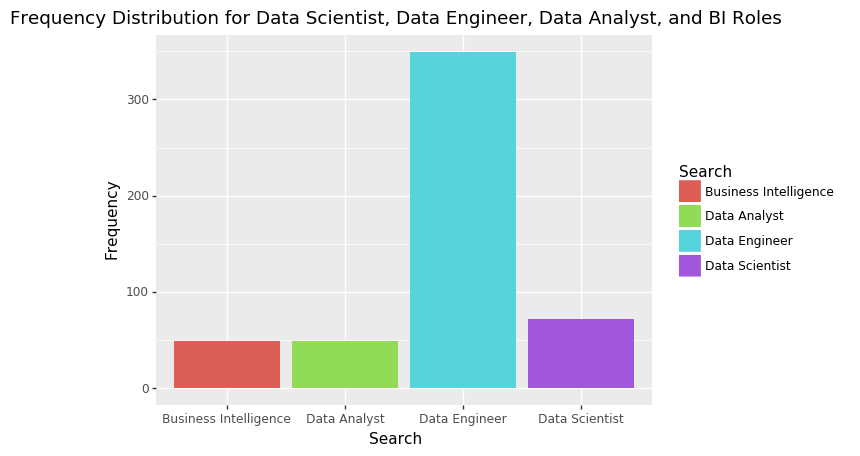

<ggplot: (-9223372029309574712)>

In [6]:
(ggplot(master_data, aes(x = 'Search',fill = 'Search')) +
 geom_bar(stat = "count", position='stack') +
 labs(title = "Frequency Distribution for Data Scientist, Data Engineer, Data Analyst, and BI Roles", x = "Search", y = "Frequency")
)

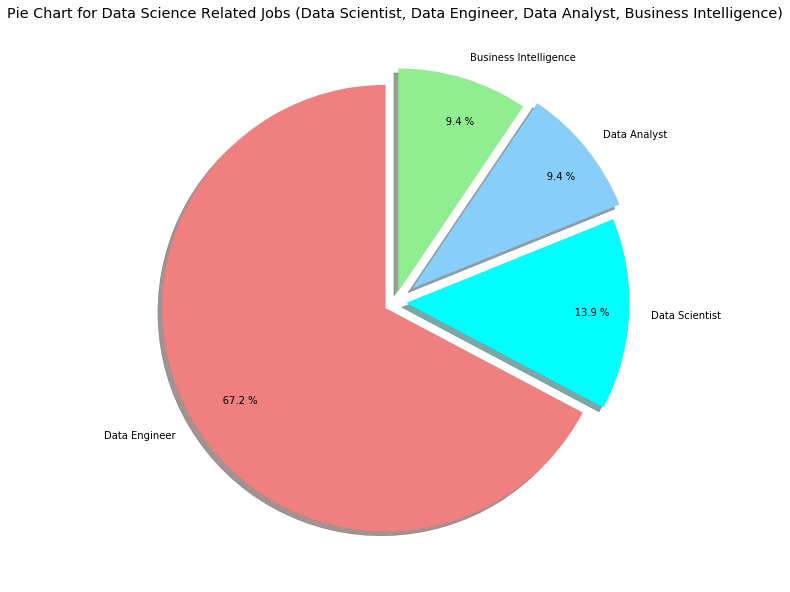

In [7]:
plt.rcParams['figure.figsize'] = (10,20)
labels = search_counts.index[0], search_counts.index[1], search_counts.index[2], search_counts.index[3]
fracs = [search_counts[i] for i in range(len(search_counts))]
explode = [0.05, 0.05, 0.1, 0.05]
plt.axes(aspect=1)  
colors = ['lightcoral', 'cyan','lightskyblue','lightgreen']
plt.title('Pie Chart for Data Science Related Jobs (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)')
plt.pie(x=fracs, labels=labels, explode=explode, autopct='%9.1f %%', colors=colors,
        shadow=True, labeldistance=1.1, startangle = 90, pctdistance = 0.8)
plt.show()

## Population State Frequencies
### What are the state frequencies representing our population?

In [8]:
state_counts = master_data['States'].value_counts()
state_counts

CA    255
NY     50
MA     27
VA     20
TX     15
WA     14
PA     12
NC     11
MD     11
IL      9
NJ      9
GA      8
MO      7
NV      6
DC      6
MI      6
TN      5
SC      5
IN      5
CO      5
AL      4
FL      4
MN      3
NE      2
NH      2
IA      2
ON      2
RI      2
CT      2
OH      2
UT      1
KS      1
WI      1
ME      1
AZ      1
AB      1
OR      1
KY      1
Name: States, dtype: int64

Here we discover that 255 of our listings are those located in the state of California. Intuition says that this may be due to the large number of technology jobs in the Silicon Valley/Bay Area. Given that we are interested in data science related jobs this makes sense. 

In [9]:
state_freqDF = pd.DataFrame({'Frequency' : state_counts.values, 'States' : state_counts.index, })
state_freqDF = state_freqDF[['States','Frequency']]

percent2 = []
for i in range(len(state_freqDF)):
    holder2 = round(state_freqDF['Frequency'][i] / state_counts.values.sum(), 4)
    percent2.append(holder2)

state_freqDF['Percent of Total'] = percent2

state_freqDF

States  Frequency  Percent of Total
0      CA        255            0.4913
1      NY         50            0.0963
2      MA         27            0.0520
3      VA         20            0.0385
4      TX         15            0.0289
5      WA         14            0.0270
6      PA         12            0.0231
7      NC         11            0.0212
8      MD         11            0.0212
9      IL          9            0.0173
10     NJ          9            0.0173
11     GA          8            0.0154
12     MO          7            0.0135
13     NV          6            0.0116
14     DC          6            0.0116
15     MI          6            0.0116
16     TN          5            0.0096
17     SC          5            0.0096
18     IN          5            0.0096
19     CO          5            0.0096
20     AL          4            0.0077
21     FL          4            0.0077
22     MN          3            0.0058
23     NE          2            0.0039
24     NH          2            0.0039
25     IA          2            0.0039
26     ON          2            0.0039
27     RI          2            0.0039
28     CT          2            0.0039
29     OH          2            0.0039
30     UT          1            0.0019
31     KS          1            0.0019
32     WI          1            0.0019
33     ME          1            0.0019
34     AZ          1            0.0019
35     AB          1            0.0019
36     OR          1            0.0019
37     KY          1            0.0019

As noted previously, a large proportion of the listings scraped given the four search terms (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) are allocated to California at 49.13%. This covers almost half of the total states represented in our population. 

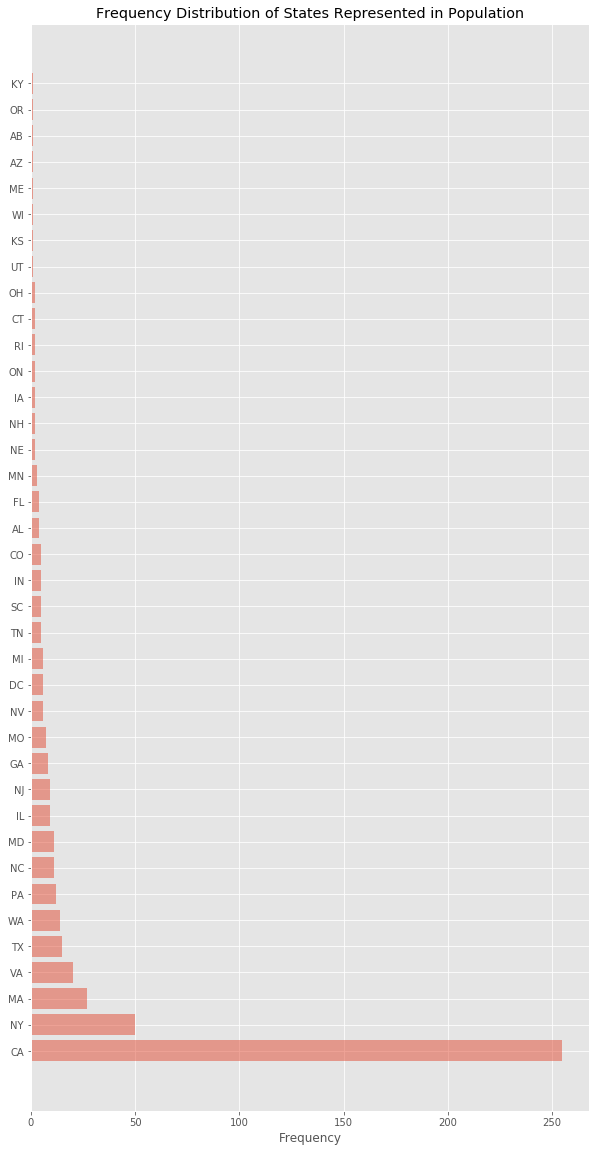

In [10]:
objects = state_counts.index
y_pos = np.arange(len(objects))
performance = state_counts.values
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Frequency')
plt.title('Frequency Distribution of States Represented in Population')
 
plt.show()

## Search Term Frequency Per State 
### How many listings are represented for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) within each state?

In [11]:
state_grouper = master_data.groupby('States')
jobs_per_state = state_grouper['Search'].value_counts()
jobs_per_state = jobs_per_state.reset_index(name = 'Frequency')
jobs_per_state

States                 Search  Frequency
0      AB         Data Scientist          1
1      AL          Data Engineer          3
2      AL  Business Intelligence          1
3      AZ           Data Analyst          1
4      CA          Data Engineer        178
5      CA         Data Scientist         35
6      CA  Business Intelligence         23
7      CA           Data Analyst         19
8      CO          Data Engineer          5
9      CT  Business Intelligence          1
10     CT          Data Engineer          1
11     DC          Data Engineer          5
12     DC           Data Analyst          1
13     FL          Data Engineer          4
14     GA          Data Engineer          4
15     GA           Data Analyst          3
16     GA  Business Intelligence          1
17     IA          Data Engineer          1
18     IA         Data Scientist          1
19     IL          Data Engineer          7
20     IL  Business Intelligence          1
21     IL         Data Scientist          1
22     IN  Business Intelligence          3
23     IN           Data Analyst          1
24     IN          Data Engineer          1
25     KS         Data Scientist          1
26     KY          Data Engineer          1
27     MA          Data Engineer         20
28     MA         Data Scientist          4
29     MA           Data Analyst          3
30     MD          Data Engineer         10
31     MD         Data Scientist          1
32     ME  Business Intelligence          1
33     MI          Data Engineer          6
34     MN          Data Engineer          3
35     MO          Data Engineer          4
36     MO  Business Intelligence          2
37     MO           Data Analyst          1
38     NC          Data Engineer          9
39     NC           Data Analyst          1
40     NC         Data Scientist          1
41     NE          Data Engineer          2
42     NH          Data Engineer          2
43     NJ           Data Analyst          4
44     NJ          Data Engineer          3
45     NJ         Data Scientist          2
46     NV           Data Analyst          4
47     NV          Data Engineer          2
48     NY          Data Engineer         23
49     NY         Data Scientist         14
50     NY  Business Intelligence          9
51     NY           Data Analyst          4
52     OH          Data Engineer          2
53     ON          Data Engineer          2
54     OR          Data Engineer          1
55     PA          Data Engineer          7
56     PA         Data Scientist          3
57     PA           Data Analyst          2
58     RI           Data Analyst          1
59     RI          Data Engineer          1
60     SC          Data Engineer          3
61     SC           Data Analyst          2
62     TN         Data Scientist          3
63     TN          Data Engineer          2
64     TX          Data Engineer          9
65     TX  Business Intelligence          5
66     TX         Data Scientist          1
67     UT          Data Engineer          1
68     VA          Data Engineer         17
69     VA         Data Scientist          2
70     VA           Data Analyst          1
71     WA          Data Engineer         10
72     WA         Data Scientist          2
73     WA  Business Intelligence          1
74     WA           Data Analyst          1
75     WI  Business Intelligence          1

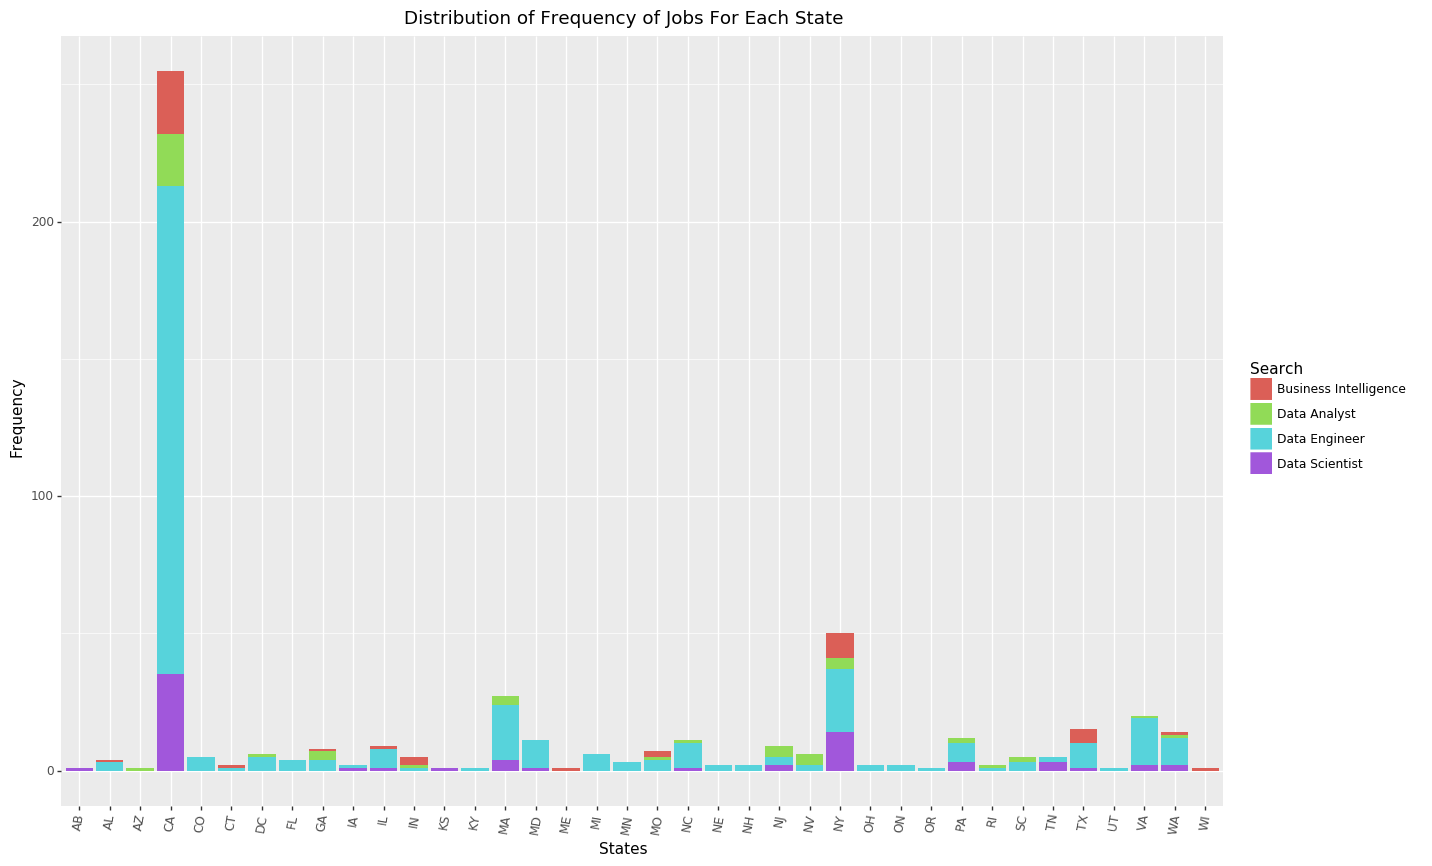

<ggplot: (-9223372029309481191)>

In [12]:
(ggplot(jobs_per_state, aes(x = "States", y = 'Frequency', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(15, 10),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Jobs For Each State", x = "States", y = "Frequency")
)

As you can see from the above plot CA and NY stand out in that they represent each of the four job types. Next, we'll standardize the counts for each state given the search term to remove the skew due to the largest proportion of listings located in the state of California. 

### What are the proportions for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence) in each state?
### Do some states have a greater proportion of their available listings allocated to a particular job type?

In [13]:
search_state_set = np.unique(jobs_per_state['States'])
search_state_dict = dict(tuple(jobs_per_state.groupby('States')))

search_freqDF = []
for state in search_state_set:
    search_state_freqDF = pd.DataFrame({'Frequency' : list(search_state_dict[state]['Frequency']), 
                                        'Search' : list(search_state_dict[state]['Search']),
                                        'States' : list(search_state_dict[state]['States'])})
    search_state_freqDF = search_state_freqDF[['States', 'Search', 'Frequency']]

    percent4 = []

    for i in range(len(search_state_freqDF)):
        holder4 = round(search_state_freqDF['Frequency'][i] / sum(list(search_state_freqDF['Frequency'])),4)
        percent4.append(holder4)
    search_state_freqDF['Percent of Total'] = percent4
    search_freqDF.append(search_state_freqDF)

search_freqDF = pd.concat(search_freqDF, ignore_index = True)
search_freqDF

States                 Search  Frequency  Percent of Total
0      AB         Data Scientist          1            1.0000
1      AL          Data Engineer          3            0.7500
2      AL  Business Intelligence          1            0.2500
3      AZ           Data Analyst          1            1.0000
4      CA          Data Engineer        178            0.6980
5      CA         Data Scientist         35            0.1373
6      CA  Business Intelligence         23            0.0902
7      CA           Data Analyst         19            0.0745
8      CO          Data Engineer          5            1.0000
9      CT  Business Intelligence          1            0.5000
10     CT          Data Engineer          1            0.5000
11     DC          Data Engineer          5            0.8333
12     DC           Data Analyst          1            0.1667
13     FL          Data Engineer          4            1.0000
14     GA          Data Engineer          4            0.5000
15     GA           Data Analyst          3            0.3750
16     GA  Business Intelligence          1            0.1250
17     IA          Data Engineer          1            0.5000
18     IA         Data Scientist          1            0.5000
19     IL          Data Engineer          7            0.7778
20     IL  Business Intelligence          1            0.1111
21     IL         Data Scientist          1            0.1111
22     IN  Business Intelligence          3            0.6000
23     IN           Data Analyst          1            0.2000
24     IN          Data Engineer          1            0.2000
25     KS         Data Scientist          1            1.0000
26     KY          Data Engineer          1            1.0000
27     MA          Data Engineer         20            0.7407
28     MA         Data Scientist          4            0.1481
29     MA           Data Analyst          3            0.1111
30     MD          Data Engineer         10            0.9091
31     MD         Data Scientist          1            0.0909
32     ME  Business Intelligence          1            1.0000
33     MI          Data Engineer          6            1.0000
34     MN          Data Engineer          3            1.0000
35     MO          Data Engineer          4            0.5714
36     MO  Business Intelligence          2            0.2857
37     MO           Data Analyst          1            0.1429
38     NC          Data Engineer          9            0.8182
39     NC           Data Analyst          1            0.0909
40     NC         Data Scientist          1            0.0909
41     NE          Data Engineer          2            1.0000
42     NH          Data Engineer          2            1.0000
43     NJ           Data Analyst          4            0.4444
44     NJ          Data Engineer          3            0.3333
45     NJ         Data Scientist          2            0.2222
46     NV           Data Analyst          4            0.6667
47     NV          Data Engineer          2            0.3333
48     NY          Data Engineer         23            0.4600
49     NY         Data Scientist         14            0.2800
50     NY  Business Intelligence          9            0.1800
51     NY           Data Analyst          4            0.0800
52     OH          Data Engineer          2            1.0000
53     ON          Data Engineer          2            1.0000
54     OR          Data Engineer          1            1.0000
55     PA          Data Engineer          7            0.5833
56     PA         Data Scientist          3            0.2500
57     PA           Data Analyst          2            0.1667
58     RI           Data Analyst          1            0.5000
59     RI          Data Engineer          1            0.5000
60     SC          Data Engineer          3            0.6000
61     SC           Data Analyst          2            0.4000
62     TN         Data Scientist          3            0.6000
63     TN          Data Engineer   

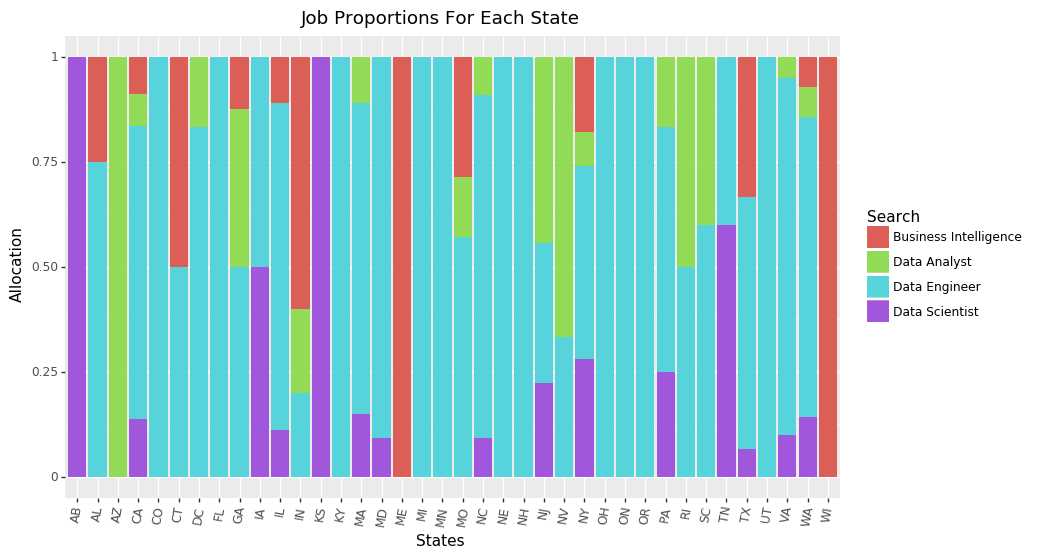

<ggplot: (7545828237)>

In [14]:
(ggplot(search_freqDF, aes(x = "States", y = 'Percent of Total', fill="Search")) +
 geom_bar(stat = "identity",position='stack')+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Job Proportions For Each State", x = "States", y = "Allocation")
)

After converting the frequency of listings for each job type given a state we are able to have a better look at the variety of data science related options for each state. Some noteworthy states are as follows: 

Four job types represented:
CA, NY

Three job types represented:
GA, IN, MA, MO, NC, NJ, PA, TX, VA, and WA

Later on we'll analyze skills and if you are interested in more than one of the given job types the above states may be a good place to look for a variety of data science related positions. 

## City Frequencies Per State
### What are the frequencies for each city within the represented states?
### Do any cities in particular stand out which may indicative of a hotspot for data science jobs?

In [15]:
city_grouper = master_data.groupby('States')
jobs_per_city = city_grouper['Cities'].value_counts()
jobs_per_city = jobs_per_city.reset_index(name = 'Frequency')
jobs_per_city = jobs_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
jobs_per_city 

States               Cities  Frequency
0       CA        San Francisco         49
1       NY        New York City         36
2       CA            San Mateo         22
3       CA             San Jose         22
4       CA               Irvine         20
5       CA          Los Angeles         18
6       CA            Palo Alto         11
7       WA              Seattle         10
8       CA         Redwood City          8
9       MA            Cambridge          8
10      IL              Chicago          8
11      GA              Atlanta          7
12      VA               Reston          7
13      CA         Santa Monica          7
14      CA            Sunnyvale          7
15      VA            Arlington          7
16      MA           Burlington          6
17      NV            Las Vegas          6
18      TX               Austin          6
19      CA            San Diego          6
20      DC           Washington          6
21      CA               Venice          6
22      NY         White Plains          5
23      CA            San Ramon          5
24      CA        Mountain View          5
25      NC              Raleigh          5
26      PA           Pittsburgh          5
27      MI              Detroit          4
28      PA         Philadelphia          4
29      MO          Saint Louis          4
30      NJ          Jersey City          4
31      CA             Berkeley          4
32      MA               Newton          3
33      MA               Boston          3
34      IN           South Bend          3
35      MD             Bethesda          3
36      SC           Charleston          3
37      MA                Acton          3
38      NJ            Princeton          3
39      CA             Milpitas          3
40      CA           Costa Mesa          3
41      CA          Culver City          3
42      CA       Woodland Hills          3
43      CA       West Hollywood          3
44      CA             Glendale          3
45      CA              Ventura          3
46      NE                Omaha          2
47      NH           Manchester          2
48      FL              Orlando          2
49      IA             Grinnell          2
50      MD           Fort Meade          2
51      MA            Wellesley          2
52      AL          Albertville          2
53      MO          Kansas City          2
54      CO     Colorado Springs          2
55      MN           Saint Paul          2
56      NY               Elmira          2
57      MA              Bedford          2
58      IN         Indianapolis          2
59      TN            Knoxville          2
60      PA              Malvern          2
61      CA          Santa Clara          2
62      TX                Plano          2
63      CA               Orange          2
64      CA              Norwalk          2
65      TX              Houston          2
66      TX               Dallas          2
67      CA           Northridge          2
68      TN            Nashville          2
69      CA           Menlo Park          2
70      CA        Laguna Niguel          2
71      CA              Gardena          2
72      CA           El Segundo          2
73      CA          Canoga Park          2
74      WA               Tacoma          2
75      VA           Alexandria          2
76      VA               Mclean          2
77      RI           Providence          2
78      CA           Pleasanton          2
79      NY        East Setauket          1
80      NY             Brooklyn          1
81      NJ              Trenton          1
82      VA           Timberlake          1
83      NJ               Hazlet          1
84      WA             Bellevue          1
85      WA               Yakima          1
86      NY            Manhattan          1
87      UT               Lindon          1
88      VA            Chantilly          1
89      NC            Randleman          1
90      OR             Portland          1
91      ON             Waterloo          1
92   

For now we'll ignore the fact that California is vastly represented in our population and can conclude that the following cities may be great places to search for Data Scientist, Data Engineer, Data Analyst, and Business Intelligence jobs.

1.) San Francisco, CA
2.) New York City, NY
3.) San Mateo, CA
4.) San Jose, CA
5.) Irvine, CA
6.) Los Angeles, CA
7.) Palo Alto, CA
8.) Seattle, WA
9.) Redwood City, CA
10.) Cambridge, MA

The idea behind why we feel that it is reasonable to ignore the much larger proportion of listings located in California is based on the fact that many of the technology companies which are known to have more data science positions are located in the Bay Area. We can see from above that five out of the top 10 represented cities are located in this area. 

In [16]:
jobs_per_city[:15]

States         Cities  Frequency
0      CA  San Francisco         49
1      NY  New York City         36
2      CA      San Mateo         22
3      CA       San Jose         22
4      CA         Irvine         20
5      CA    Los Angeles         18
6      CA      Palo Alto         11
7      WA        Seattle         10
8      CA   Redwood City          8
9      MA      Cambridge          8
10     IL        Chicago          8
11     GA        Atlanta          7
12     VA         Reston          7
13     CA   Santa Monica          7
14     CA      Sunnyvale          7

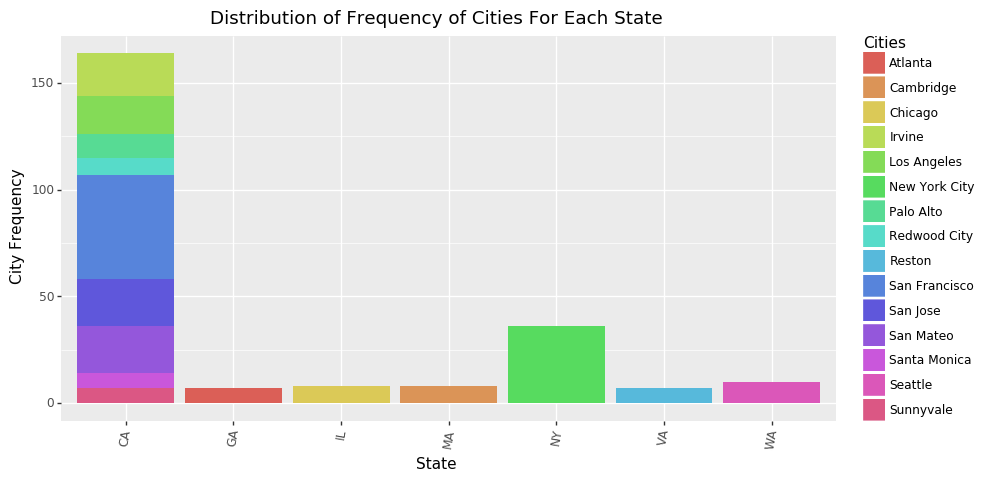

<ggplot: (7545608263)>

In [17]:
(ggplot(jobs_per_city[:15], aes(x = "States", y = 'Frequency', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = True)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "Distribution of Frequency of Cities For Each State", x = "State", y = "City Frequency")
)

In order to support our previous statement, California stands out because compared to the other states there are many different options for city locations within that state. Unlike the other top city states where there are no more than two city options. 

### How does the number of cities proportionate to the total number of listings for a particular state effect the distribution of listings in our population?

In [18]:
search_cities_set = np.unique(jobs_per_city['States'])
search_cities_dict = dict(tuple(jobs_per_city.groupby('States')))

search_cit_freqDF = []
for city in search_cities_set:
    search_cities_freqDF = pd.DataFrame({'Frequency' : list(search_cities_dict[city]['Frequency']), 
                                         'Cities' : list(search_cities_dict[city]['Cities']),
                                         'States' : list(search_cities_dict[city]['States'])})
    
    search_cities_freqDF = search_cities_freqDF[['States','Cities','Frequency']]

    percent5 = []

    for i in range(len(search_cities_freqDF)):
        holder5 = round(search_cities_freqDF['Frequency'][i] / sum(list(search_cities_freqDF['Frequency'])),4)
        percent5.append(holder5)
    search_cities_freqDF['Percent of Total'] = percent5
    search_cit_freqDF.append(search_cities_freqDF)

search_cit_freqDF = pd.concat(search_cit_freqDF, ignore_index = True)
search_cit_freqDF = search_cit_freqDF.sort_values(by = 'States',ascending = True).reset_index(drop = True)
search_cit_freqDF

States               Cities  Frequency  Percent of Total
0       AB              Calgary          1            1.0000
1       AL          Albertville          2            0.5000
2       AL           Huntsville          1            0.2500
3       AL               Daphne          1            0.2500
4       AZ           Scottsdale          1            1.0000
5       CA         Palm Springs          1            0.0039
6       CA             Pasadena          1            0.0039
7       CA        Redondo Beach          1            0.0039
8       CA            Roseville          1            0.0039
9       CA            Santa Ana          1            0.0039
10      CA             Torrance          1            0.0039
11      CA      North Hollywood          1            0.0039
12      CA       Marina Del Rey          1            0.0039
13      CA           Pleasanton          2            0.0078
14      CA          Canoga Park          2            0.0078
15      CA        Santa Barbara          1            0.0039
16      CA        Newport Beach          1            0.0039
17      CA              Fremont          1            0.0039
18      CA           Long Beach          1            0.0039
19      CA           El Segundo          2            0.0078
20      CA          Foster City          1            0.0039
21      CA            Cupertino          1            0.0039
22      CA              Concord          1            0.0039
23      CA             Carlsbad          1            0.0039
24      CA             Campbell          1            0.0039
25      CA        Beverly Hills          1            0.0039
26      CA          Aliso Viejo          1            0.0039
27      CA             Van Nuys          1            0.0039
28      CA       Ventura County          1            0.0039
29      CA             Westwood          1            0.0039
30      CA                 Napa          1            0.0039
31      CA              Gardena          2            0.0078
32      CA           San Carlos          1            0.0039
33      CA           Menlo Park          2            0.0078
34      CA        San Francisco         49            0.1922
35      CA            San Mateo         22            0.0863
36      CA        Laguna Niguel          2            0.0078
37      CA               Irvine         20            0.0784
38      CA          Los Angeles         18            0.0706
39      CA            Palo Alto         11            0.0431
40      CA         Redwood City          8            0.0314
41      CA         Santa Monica          7            0.0275
42      CA            Sunnyvale          7            0.0275
43      CA            San Diego          6            0.0235
44      CA               Venice          6            0.0235
45      CA            San Ramon          5            0.0196
46      CA        Mountain View          5            0.0196
47      CA             San Jose         22            0.0863
48      CA             Milpitas          3            0.0118
49      CA           Northridge          2            0.0078
50      CA              Norwalk          2            0.0078
51      CA               Orange          2            0.0078
52      CA              Ventura          3            0.0118
53      CA             Glendale          3            0.0118
54      CA          Santa Clara          2            0.0078
55      CA       West Hollywood          3            0.0118
56      CA       Woodland Hills          3            0.0118
57      CA          Culver City          3            0.0118
58      CA           Costa Mesa          3            0.0118
59      CA             Berkeley          4            0.0157
60      CO               Denver          1            0.2000
61      CO     Colorado Springs          2            0.4000
62      CO              Boulder          1            0.2000
63      CO             Loveland          1            0.2000
64      CT            Fairfield        

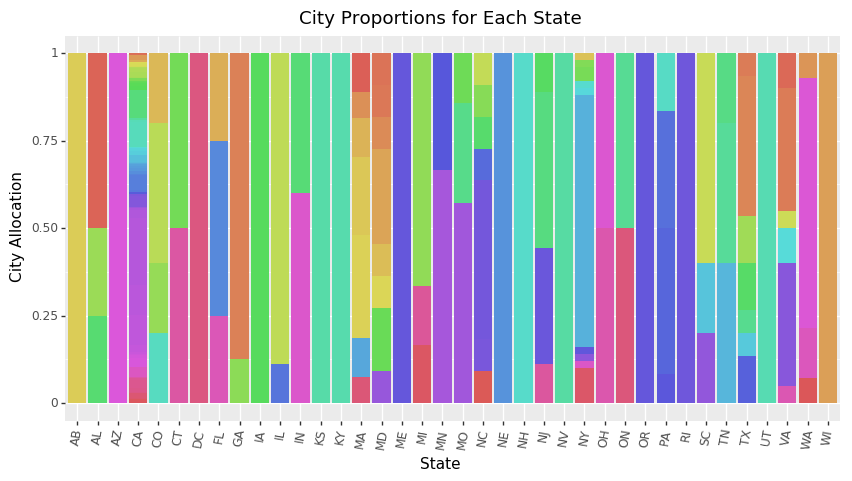

<ggplot: (7545279836)>

In [19]:
(ggplot(search_cit_freqDF, aes(x = "States", y = 'Percent of Total', fill="Cities")) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 5),axis_text_x= element_text(rotation=80))+
 labs(title = "City Proportions for Each State", x = "State", y = "City Allocation")
)

You will notice above that states with a greater number of cities represented given our listings is indicative of a wider range of options for relocation when thinking about your job search. 

California, Colorado, Massachussetts, Maryland, and North Carolina have a large number of cities represented by our listings meaning a job seeker has options for the same job title but in different cities with a preferred state. 

## Data Scientist Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Scientist position?

In [20]:
ds_city_grouper = data_scientist_df.groupby('Location')
ds_per_city = ds_city_grouper['Search'].value_counts()
ds_per_city = ds_per_city.reset_index(name = 'Frequency')
ds_per_city = ds_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
ds_per_city

Location          Search  Frequency
0      New York City, NY  Data Scientist         13
1      San Francisco, CA  Data Scientist         12
2        Los Angeles, CA  Data Scientist          4
3          Sunnyvale, CA  Data Scientist          3
4          San Mateo, CA  Data Scientist          3
5           Berkeley, CA  Data Scientist          2
6          Cambridge, MA  Data Scientist          2
7          Nashville, TN  Data Scientist          2
8           San Jose, CA  Data Scientist          2
9     West Hollywood, CA  Data Scientist          2
10           Trenton, NJ  Data Scientist          1
11           Seattle, WA  Data Scientist          1
12      Santa Monica, CA  Data Scientist          1
13      Redwood City, CA  Data Scientist          1
14  Plymouth Meeting, PA  Data Scientist          1
15        Pittsburgh, PA  Data Scientist          1
16         Pineville, NC  Data Scientist          1
17      Philadelphia, PA  Data Scientist          1
18            Newton, MA  Data Scientist          1
19        Alexandria, VA  Data Scientist          1
20              Napa, CA  Data Scientist          1
21           Chicago, IL  Data Scientist          1
22           Bedford, MA  Data Scientist          1
23          Bellevue, WA  Data Scientist          1
24          Bethesda, MD  Data Scientist          1
25           Calgary, AB  Data Scientist          1
26          Campbell, CA  Data Scientist          1
27         Chantilly, VA  Data Scientist          1
28        Costa Mesa, CA  Data Scientist          1
29            Austin, TX  Data Scientist          1
30            Elmira, NY  Data Scientist          1
31       Foster City, CA  Data Scientist          1
32          Grinnell, IA  Data Scientist          1
33            Hazlet, NJ  Data Scientist          1
34         Knoxville, TN  Data Scientist          1
35           Leawood, KS  Data Scientist          1
36    Woodland Hills, CA  Data Scientist          1

In [21]:
TOP_ds = ds_per_city[:10]

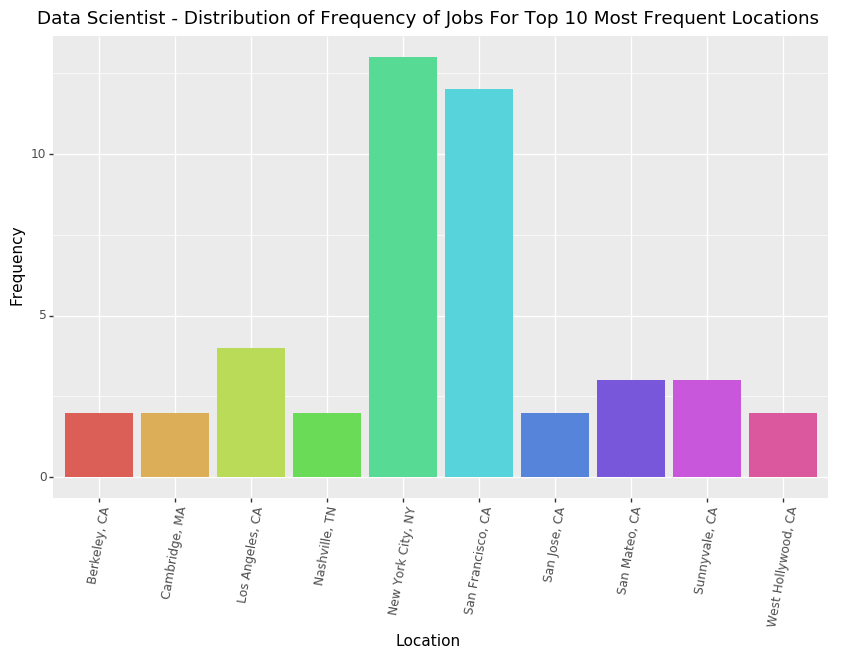

<ggplot: (-9223372029308948178)>

In [22]:
(ggplot(TOP_ds, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Scientist - Distribution of Frequency of Jobs For Top 10 Most Frequent Locations", x = "Location", y = "Frequency")
)

If you are seeking a data scientist position, your best option is to look in New York City - NY and San Francisco - CA. 

## Data Engineer Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Engineer position?

In [23]:
de_city_grouper = data_engineer_df.groupby('Location')
de_per_city = de_city_grouper['Search'].value_counts()
de_per_city = de_per_city.reset_index(name = 'Frequency')
de_per_city = de_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
de_per_city

Location         Search  Frequency
0          San Francisco, CA  Data Engineer         34
1               San Jose, CA  Data Engineer         20
2          New York City, NY  Data Engineer         17
3              San Mateo, CA  Data Engineer         16
4                 Irvine, CA  Data Engineer         13
5            Los Angeles, CA  Data Engineer         13
6              Palo Alto, CA  Data Engineer          8
7                Seattle, WA  Data Engineer          8
8                 Reston, VA  Data Engineer          7
9                Chicago, IL  Data Engineer          7
10             Arlington, VA  Data Engineer          7
11          Redwood City, CA  Data Engineer          6
12            Burlington, MA  Data Engineer          6
13         Mountain View, CA  Data Engineer          5
14          Santa Monica, CA  Data Engineer          5
15                Venice, CA  Data Engineer          5
16            Washington, DC  Data Engineer          5
17               Raleigh, NC  Data Engineer          5
18             Sunnyvale, CA  Data Engineer          4
19             San Diego, CA  Data Engineer          4
20             Cambridge, MA  Data Engineer          4
21               Detroit, MI  Data Engineer          4
22           Culver City, CA  Data Engineer          3
23            Pittsburgh, PA  Data Engineer          3
24              Glendale, CA  Data Engineer          3
25                 Acton, MA  Data Engineer          3
26            Charleston, SC  Data Engineer          3
27             San Ramon, CA  Data Engineer          3
28               Atlanta, GA  Data Engineer          3
29                Austin, TX  Data Engineer          3
30           Saint Louis, MO  Data Engineer          3
31           Jersey City, NJ  Data Engineer          3
32                Boston, MA  Data Engineer          3
33          Philadelphia, PA  Data Engineer          2
34               Orlando, FL  Data Engineer          2
35           Santa Clara, CA  Data Engineer          2
36                 Omaha, NE  Data Engineer          2
37            Northridge, CA  Data Engineer          2
38            Saint Paul, MN  Data Engineer          2
39                 Plano, TX  Data Engineer          2
40            Menlo Park, CA  Data Engineer          2
41            Manchester, NH  Data Engineer          2
42           Albertville, AL  Data Engineer          2
43                Tacoma, WA  Data Engineer          2
44             Las Vegas, NV  Data Engineer          2
45             Wellesley, MA  Data Engineer          2
46               Norwalk, CA  Data Engineer          2
47               Malvern, PA  Data Engineer          2
48      Colorado Springs, CO  Data Engineer          2
49               Gardena, CA  Data Engineer          2
50              Berkeley, CA  Data Engineer          2
51              Bethesda, MD  Data Engineer          2
52            Fort Meade, MD  Data Engineer          2
53                Dallas, TX  Data Engineer          2
54           Canoga Park, CA  Data Engineer          1
55          Camp Springs, MD  Data Engineer          1
56             Roseville, CA  Data Engineer          1
57            San Carlos, CA  Data Engineer          1
58                 Solon, OH  Data Engineer          1
59                 Bowie, MD  Data Engineer          1
60               Boulder, CO  Data Engineer          1
61            Boca Raton, FL  Data Engineer          1
62             Rockville, MD  Data Engineer          1
63         Beverly Hills, CA  Data Engineer          1
64             Rochester, NY  Data Engineer          1
65         Santa Barbara, CA  Data Engineer          1
66              Carlsbad, CA  Data Engineer          1
67               Bedford, MA  Data Engineer          1
68             Baltimore, MD  Data Engineer          1
69          Huntersville, NC  Data Engineer          1
70             Charlotte, NC  Data Engineer          1
71             Arlington, TX  Data Engineer          1
72   

In [24]:
TOP_de = de_per_city[:10]

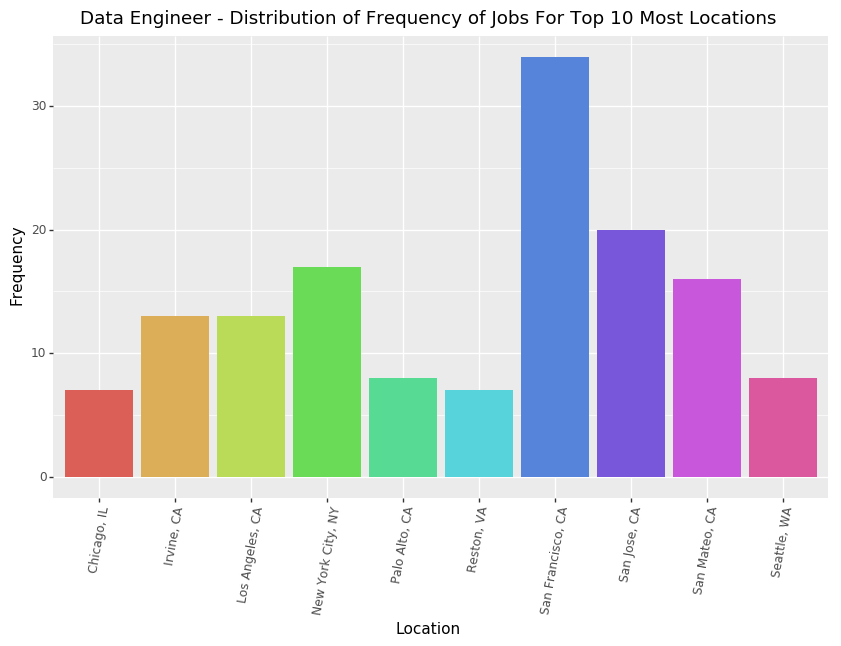

<ggplot: (-9223372029309508643)>

In [25]:
(ggplot(TOP_de, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Engineer - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data engineering position, your best option is to look in San Francisco - CA, San Jose - CA, San Mateo - CA, and New York City - NY. 

## Data Analyst Listing Frequencies Per City
### What are the top 10 cities in the USA for a person seeking a Data Analyst position?

In [26]:
da_city_grouper = data_analyst_df.groupby('Location')
da_per_city = da_city_grouper['Search'].value_counts()
da_per_city = da_per_city.reset_index(name = 'Frequency')
da_per_city = da_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
da_per_city

Location        Search  Frequency
0    New York City, NY  Data Analyst          4
1        Las Vegas, NV  Data Analyst          4
2          Atlanta, GA  Data Analyst          3
3          Ventura, CA  Data Analyst          3
4        Princeton, NJ  Data Analyst          3
5    Laguna Niguel, CA  Data Analyst          2
6       Pleasanton, CA  Data Analyst          2
7   Woodland Hills, CA  Data Analyst          2
8           Orange, CA  Data Analyst          2
9        Cambridge, MA  Data Analyst          2
10       San Ramon, CA  Data Analyst          2
11          Venice, CA  Data Analyst          1
12      Scottsdale, AZ  Data Analyst          1
13      Washington, DC  Data Analyst          1
14   San Francisco, CA  Data Analyst          1
15       Rock Hill, SC  Data Analyst          1
16       Randleman, NC  Data Analyst          1
17      Providence, RI  Data Analyst          1
18    Palm Springs, CA  Data Analyst          1
19      Pittsburgh, PA  Data Analyst          1
20    Philadelphia, PA  Data Analyst          1
21          Newton, MA  Data Analyst          1
22  Mount Pleasant, SC  Data Analyst          1
23          Mclean, VA  Data Analyst          1
24     Los Angeles, CA  Data Analyst          1
25     Kansas City, MO  Data Analyst          1
26     Jersey City, NJ  Data Analyst          1
27    Indianapolis, IN  Data Analyst          1
28      El Segundo, CA  Data Analyst          1
29     Canoga Park, CA  Data Analyst          1
30          Yakima, WA  Data Analyst          1

In [27]:
TOP_da = da_per_city[:10]

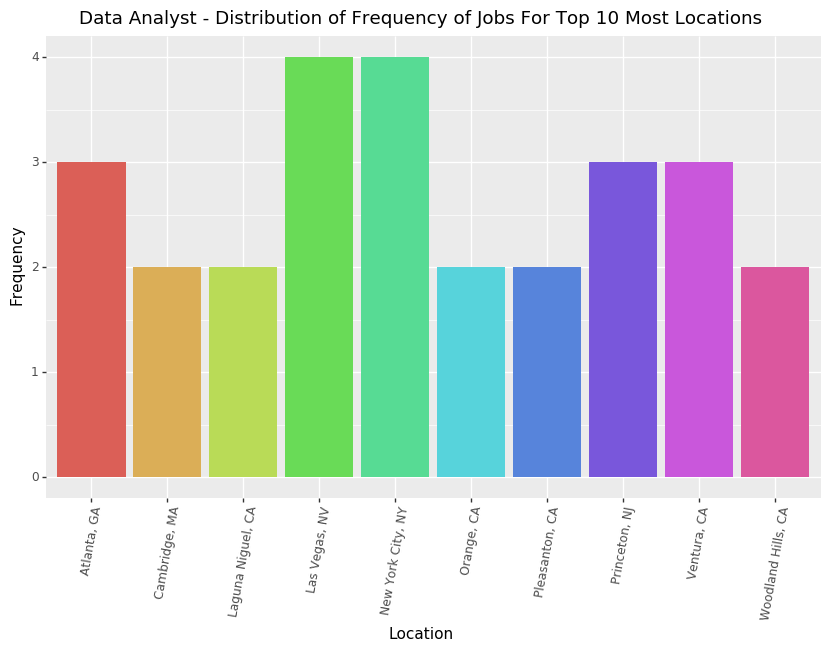

<ggplot: (-9223372029308922543)>

In [28]:
(ggplot(TOP_da, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Data Analyst - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a data analyst position, your best option is to look in Las Vegas - NV, New York City - NY, Atlanta - GA, Princeton - NJ, and Ventura - CA. 

## Business Intelligence Listing Frequency Per City
### What are the top 10 cities in the USA for a person seeking a Business Intelligence position?

In [29]:
bi_city_grouper = BI_df.groupby('Location')
bi_per_city = bi_city_grouper['Search'].value_counts()
bi_per_city = bi_per_city.reset_index(name = 'Frequency')
bi_per_city = bi_per_city.sort_values(by = 'Frequency',ascending = False).reset_index(drop = True)
bi_per_city

Location                 Search  Frequency
0            Irvine, CA  Business Intelligence          7
1      White Plains, NY  Business Intelligence          5
2        South Bend, IN  Business Intelligence          3
3         San Mateo, CA  Business Intelligence          3
4         Palo Alto, CA  Business Intelligence          3
5     San Francisco, CA  Business Intelligence          2
6          Milpitas, CA  Business Intelligence          2
7         San Diego, CA  Business Intelligence          2
8     New York City, NY  Business Intelligence          2
9            Austin, TX  Business Intelligence          2
10     Redwood City, CA  Business Intelligence          1
11       Torrington, CT  Business Intelligence          1
12          Seattle, WA  Business Intelligence          1
13     Santa Monica, CA  Business Intelligence          1
14        Santa Ana, CA  Business Intelligence          1
15      Saint Louis, MO  Business Intelligence          1
16          Atlanta, GA  Business Intelligence          1
17         Portland, ME  Business Intelligence          1
18  Port Washington, NY  Business Intelligence          1
19    Missouri City, TX  Business Intelligence          1
20             Katy, TX  Business Intelligence          1
21      Kansas City, MO  Business Intelligence          1
22          Houston, TX  Business Intelligence          1
23           Daphne, AL  Business Intelligence          1
24       Costa Mesa, CA  Business Intelligence          1
25         Brooklyn, NY  Business Intelligence          1
26           Berlin, WI  Business Intelligence          1
27           Peoria, IL  Business Intelligence          1

In [30]:
TOP_bi = bi_per_city[:10]

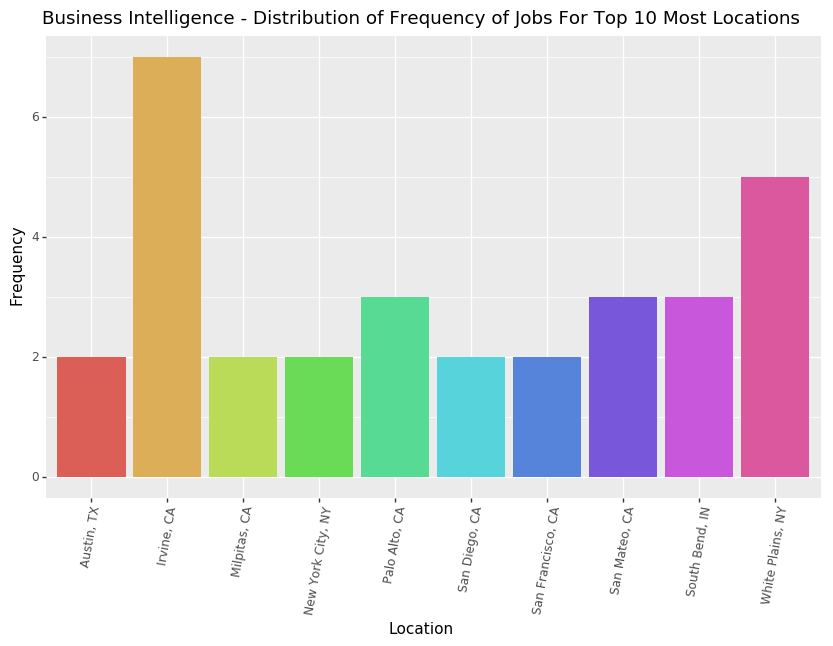

<ggplot: (7546940129)>

In [31]:
(ggplot(TOP_bi, aes(x = "Location", y = 'Frequency', fill='Location')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Business Intelligence - Distribution of Frequency of Jobs For Top 10 Most Locations", x = "Location", y = "Frequency")
)

If you are seeking a business intelligence position, your best option is to look in Irvine - CA and White Plains - NY.

# 2.) Analysis - Preferred Qualifications 

In [32]:
stop_words = stopwords.words("english") + ['data',
                                           'analysis',
                                           'development',
                                           'design',
                                           'modeling',
                                           'systems',
                                           'analytics',
                                           'test',
                                           'management',
                                           'security',
                                           'server',
                                           'system',
                                           'engineering',
                                           'model',
                                           'experience', 
                                           'data', 
                                           'structures',
                                           'science',
                                           'software',
                                           'algorithms',
                                           'testing',
                                           'business']


In [33]:
skills_df = master_data.copy()

In [34]:
for i in range(len(skills_df)):
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Machine Learning",'Machine-Learning')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Big Data",'Big-Data')
    skills_df.loc[i, 'Skills'] = skills_df['Skills'][i].replace("Tekla Structures",'Tekla-Structures')

In [35]:
skills_set = set(skills_df['Skills'])

In [36]:
skills_set

{'.NET, C#, SQL, Agile Software Development, ASP.NET, NoSQL, AngularJS',
 '.NET, C#, SQL, Team Foundation Server (TFS), Agile Software Development',
 '.NET, C#, Windows, Big-Data, SQL Server',
 '.NET, Visual Studio, C#, SQL, MVC',
 'AI, Marketing, Strategic Partnerships, Business Development, Artificial Intelligence, Machine-Learning',
 'API Development, Large Data Sets, C#, Java, Python, AWS, REACT, Node.js, Agile Methodologies, elastic search',
 'ASIC/SoC, Verification Flows, Verification process, SV/UVM environments, SoC architecture/design, CPU, Data center protocols, Ethernet, Startup Experience',
 "ASP.NET MVC, C#, JavaScript, WCF, RESTful API's",
 'ASP.NET MVC, C#/.NET, SQL Server, Developing Custom Internal Business Applications',
 'ASP.NET, MVC, C#, JQuery, SQL, Entity Framework',
 'AWS, Big-Data, Python, Production Level Coding',
 'Ability to be client facing, Mathematics, Can interpret data, Excel',
 'Account Executive, Sales, SaaS, Business Intelligence, B2B Sales',
 'Air Q

In [37]:
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

def newtext(text):
    '''Return a new text after the stopwords and lemmatizing'''
    blob = TextBlob(text)
    new_text = " ".join(w for w in blob.words if w.lower() not in stop_words)
    blob = TextBlob(new_text)
    tags = [wordnet_pos(x[1]) for x in blob.pos_tags]
    new_text = " ".join(x.lemmatize(t) for x, t in zip(blob.words, tags))
    blob = TextBlob(new_text)
    return new_text

def ReturnCount(text):
    '''Return a word counts dictionary'''
    new = newtext(text)
    blob = TextBlob(new)
    return blob.word_counts  

def countdata(text):
    '''
    Sort the counts of each distinct word
    input:text(string)
    output:datafrane of the word counts dictionary
    '''
    dic = ReturnCount(text)
    count=pd.DataFrame(list(dic.items()), columns=['word', 'count'])
    return count

def countsort(text):
    '''
    sort the countdata
    input:text(string)
    output:dataframe of 10 most frequent words and their counts
    '''
    df1 = countdata(text)
    newdf = df1.sort_values(by='count', ascending=False).head(20)
    return newdf

def barplot(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:barplot of the most frequent words and counts
    '''
    data = countsort(text)
    new = newtext(text)
    plt.rcParams['figure.figsize'] = (10, 10)
    sns.set(font_scale = 1.5)

    sns.set_style("whitegrid")
    fruit_bar = sns.barplot(x = "word", y = "count", data =data)
    for item in fruit_bar.get_xticklabels():
        item.set_rotation(60)
    plt.title(theme)
    fruit_bar.set(ylabel = 'Count', xlabel = 'Word')
    p=plt.show()
    return p

def wordcloud(text,theme):
    '''
    input:text(string),theme like art,sports(string)
    output:wordcloud of the text
    '''
    data=countsort(text)
    new=newtext(text)

    # Generate a word cloud image
    wordcloud = WordCloud().generate(new)

   # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(new)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title('wordcloud of '+theme)
    p=plt.show()
    return p


### Top Skills Overall (Data Scientist, Data Engineer, Data Analyst, Business Intelligence)

In [38]:
skills=' '.join([str(i) for i in skills_df['Skills']])
skills_frequency = countsort(skills)
skills_frequency = skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
skills_frequency = skills_frequency.rename(columns = {'word' : 'Overall', 'count' : 'Frequency'})
skills_frequency

Overall  Frequency
0             python        172
1               java        138
2                sql        130
3   machine-learning        100
4                  c         88
5           big-data         77
6             hadoop         64
7                aws         59
8              linux         47
9         javascript         45
10             spark         44
11             scala         40
12               etl         36
13      intelligence         33
14             cisco         32
15           network         32
16             cloud         32
17                 r         32
18               web         30
19             kafka         30

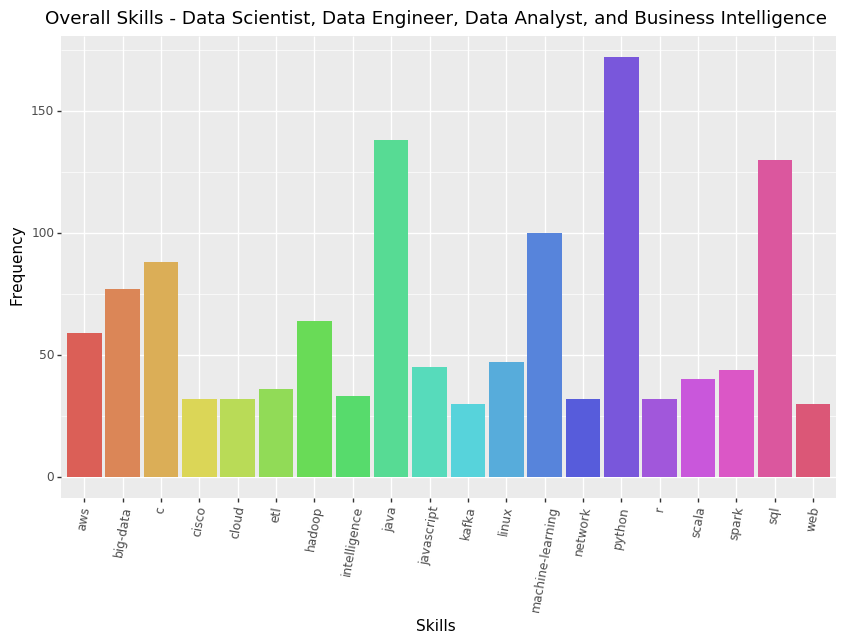

<ggplot: (-9223372029307352369)>

In [40]:
(ggplot(skills_frequency, aes(x = "Overall", y = 'Frequency', fill='Overall')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence", x = "Skills", y = "Frequency")
)

In [41]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    """
    Purpose : Change the color of the words in the word cloud to grey scale 
    """
    return "hsl(0, 0%%, %d%%)" % random.randint(70, 100)

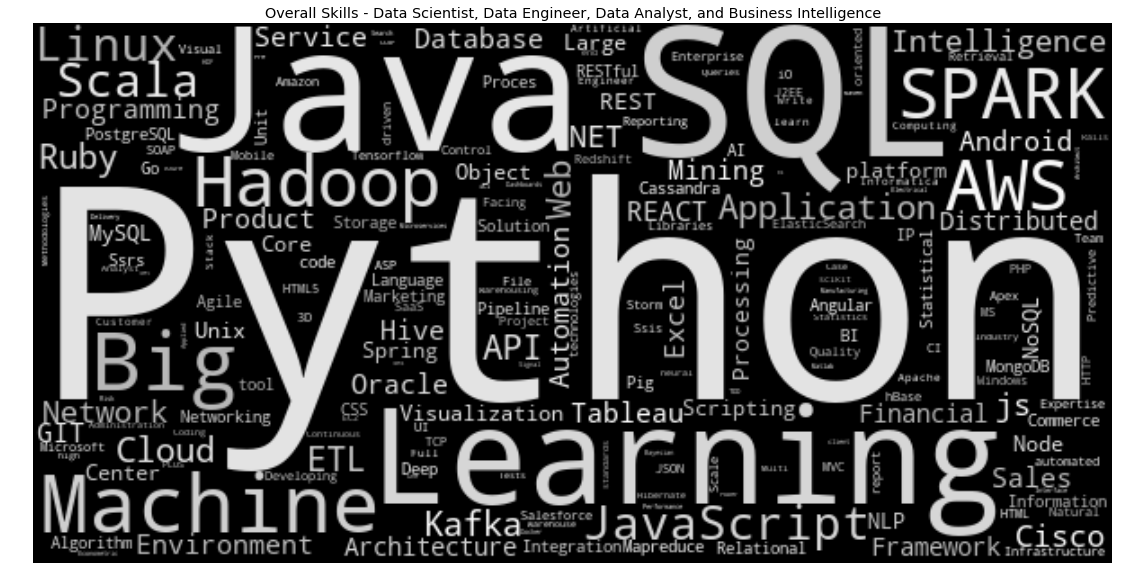

In [42]:
overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
overall_skills.generate(skills)
plt.figure(figsize = (15,7.5))
plt.imshow(overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist, Data Engineer, Data Analyst, and Business Intelligence")
plt.show()

### Top Skills - Data Scientist

In [45]:
ds_skills=' '.join([str(i) for i in data_scientist_df['Skills']])
ds_skills_frequency = countsort(ds_skills)
ds_skills_frequency = ds_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
ds_skills_frequency = ds_skills_frequency.rename(columns = {'word' : 'Data Scientist', 'count' : 'Frequency'})
ds_skills_frequency

Data Scientist  Frequency
0        learning         66
1         machine         58
2          python         51
3               r         22
4             sql         19
5          mining         13
6          hadoop         13
7             nlp         11
8             big         10
9            java          8
10          spark          8
11             ai          7
12     predictive          7
13    statistical          7
14        product          7
15           risk          6
16         neural          6
17       bayesian          6
18           code          6
19        network          6

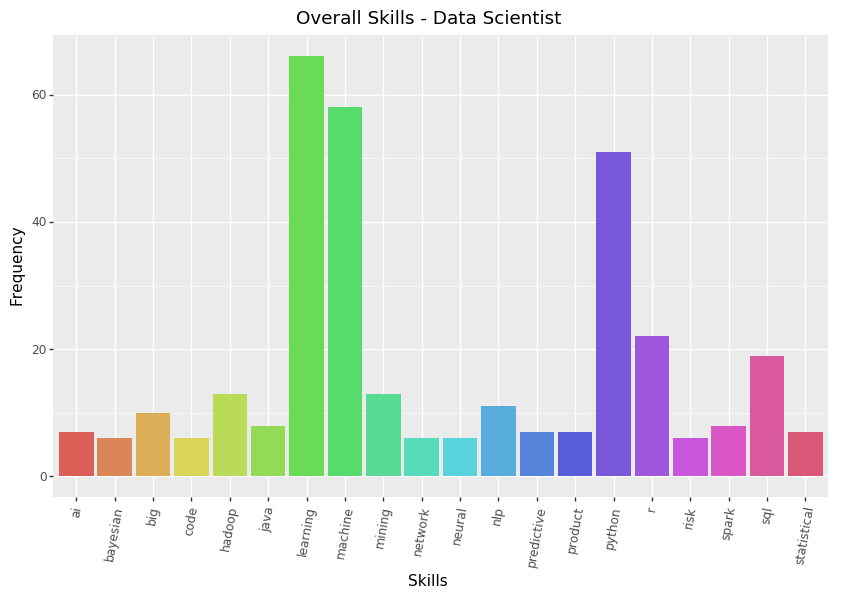

<ggplot: (-9223372029307993365)>

In [47]:
(ggplot(ds_skills_frequency, aes(x = "Data Scientist", y = 'Frequency', fill='Data Scientist')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Scientist", x = "Skills", y = "Frequency")
)

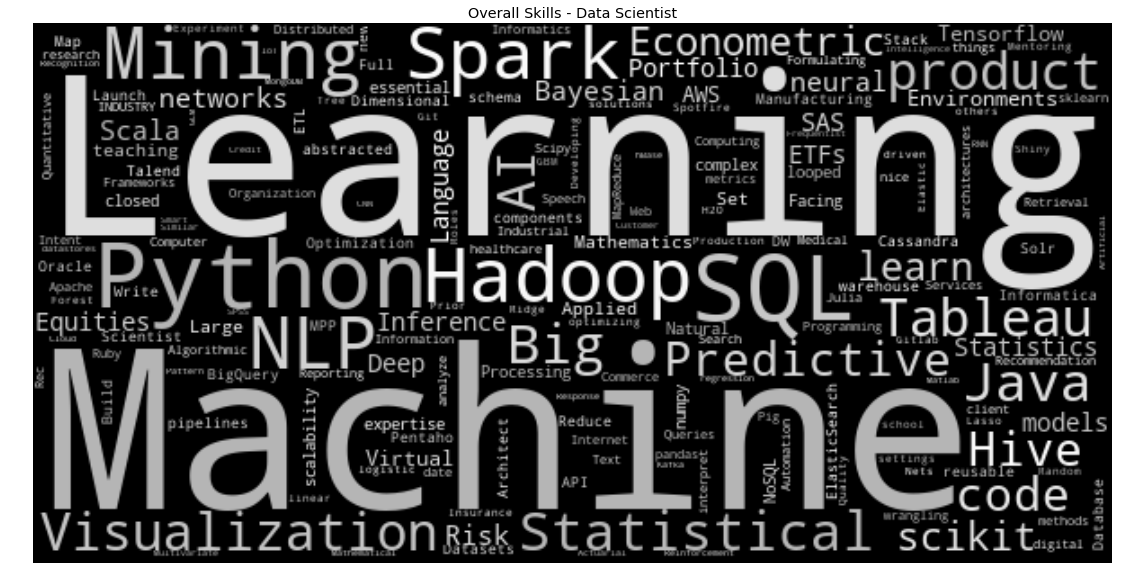

In [48]:
ds_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
ds_overall_skills.generate(ds_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(ds_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Scientist")
plt.show()

### Top Skills  - Data Engineer

In [49]:
de_skills=' '.join([str(i) for i in data_engineer_df['Skills']])
de_skills_frequency = countsort(de_skills)
de_skills_frequency = de_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
de_skills_frequency = de_skills_frequency.rename(columns = {'word' : 'Data Engineer', 'count' : 'Frequency'})
de_skills_frequency

Data Engineer  Frequency
0           java        120
1         python        112
2              c         76
3            big         73
4            sql         62
5            aws         51
6         hadoop         50
7       learning         47
8          linux         47
9        machine         43
10    javascript         42
11         spark         35
12         scala         34
13         cisco         32
14          ruby         29
15           web         28
16   application         27
17         cloud         27
18         kafka         26
19       android         26

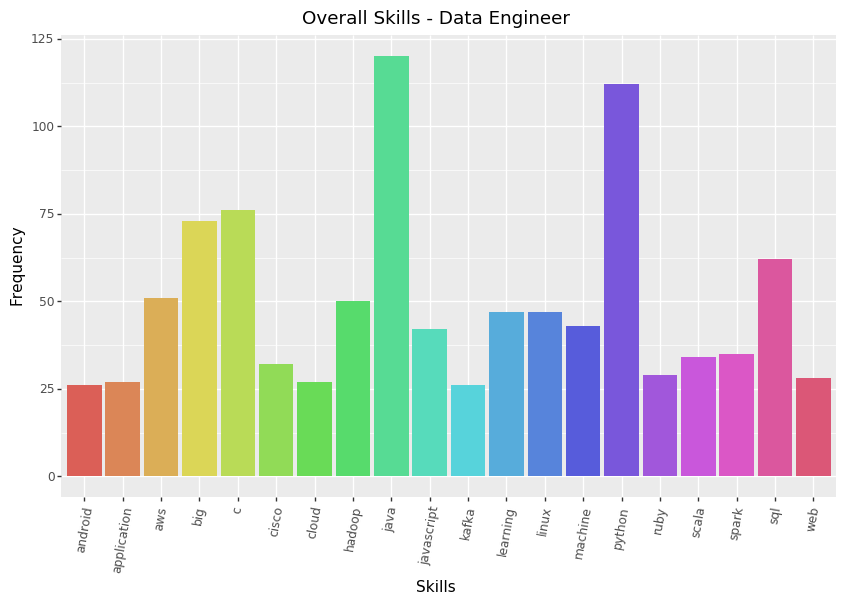

<ggplot: (-9223372029300455813)>

In [50]:
(ggplot(de_skills_frequency, aes(x = "Data Engineer", y = 'Frequency', fill='Data Engineer')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Engineer", x = "Skills", y = "Frequency")
)

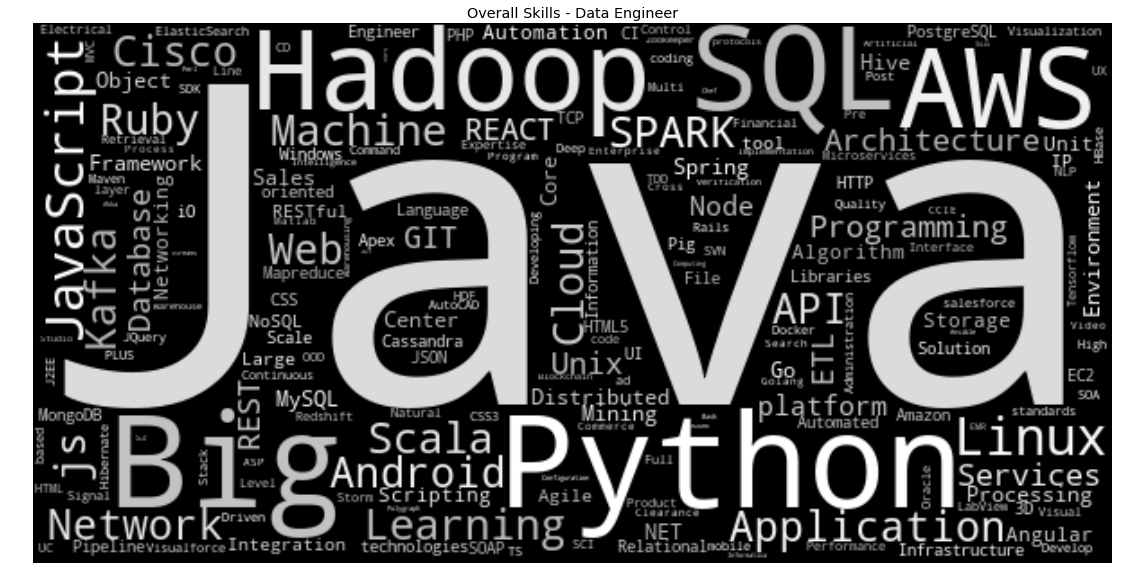

In [51]:
de_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
de_overall_skills.generate(de_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(de_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Engineer")
plt.show()

### Top Skills - Data Analyst

In [52]:
da_skills=' '.join([str(i) for i in data_analyst_df['Skills']])
da_skills_frequency = countsort(da_skills)
da_skills_frequency = da_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
da_skills_frequency = da_skills_frequency.rename(columns = {'word' : 'Data Analyst', 'count' : 'Frequency'})
da_skills_frequency

Data Analyst  Frequency
0           sql         30
1         excel         18
2       tableau         10
3     financial         10
4       analyst          8
5        python          8
6    automation          8
7     marketing          5
8    e-commerce          5
9        create          5
10      project          5
11        query          4
12      process          4
13     automate          4
14         team          4
15        write          4
16         test          4
17          end          4
18           qa          4
19           ms          4

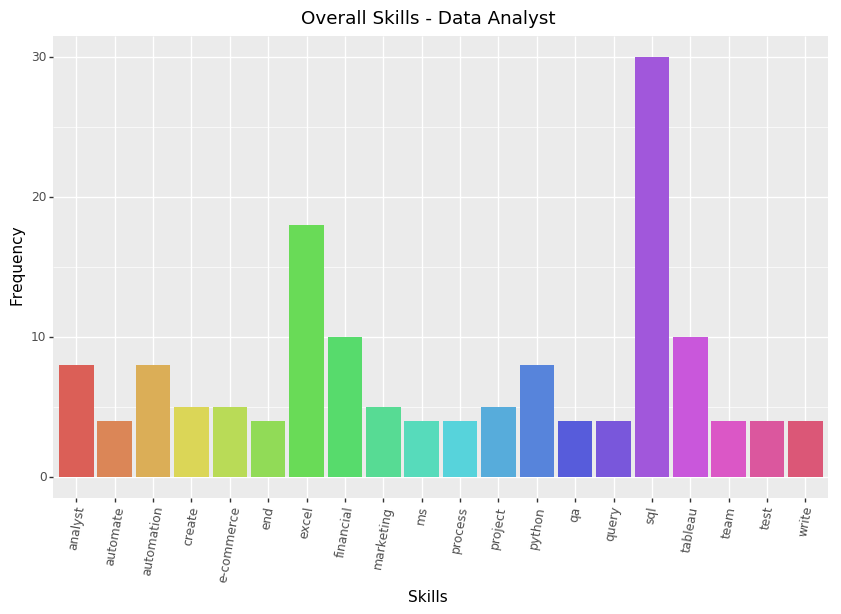

<ggplot: (283240652)>

In [53]:
(ggplot(da_skills_frequency, aes(x = "Data Analyst", y = 'Frequency', fill='Data Analyst')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Data Analyst", x = "Skills", y = "Frequency")
)

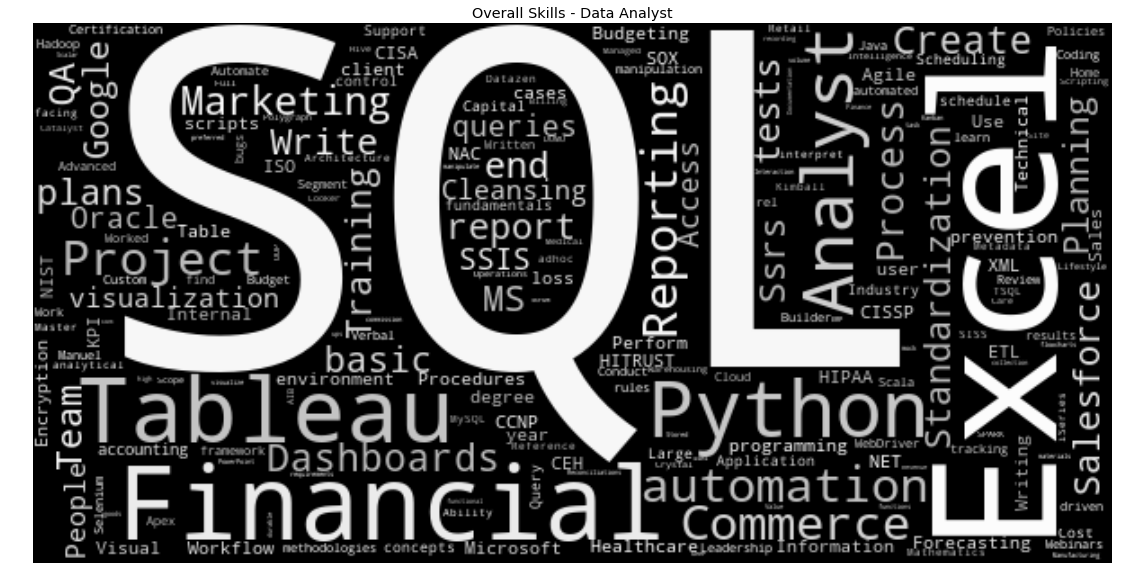

In [54]:
da_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
da_overall_skills.generate(da_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(da_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Data Analyst")
plt.show()

### Top Skills - Business Intelligence

In [55]:
bi_skills=' '.join([str(i) for i in BI_df['Skills']])
bi_skills_frequency = countsort(bi_skills)
bi_skills_frequency = bi_skills_frequency.sort_values(by = 'count', ascending = False).reset_index(drop = True)
bi_skills_frequency = bi_skills_frequency.rename(columns = {'word' : 'Business Intelligence', 'count' : 'Frequency'})
bi_skills_frequency

Business Intelligence  Frequency
0           intelligence         27
1                    sql         19
2                     bi         15
3                 oracle         12
4                    etl         11
5                   java          9
6                product          8
7                  sales          8
8             enterprise          7
9                    one          7
10                   net          7
11             marketing          6
12               tableau          6
13                 power          6
14                  saas          6
15               process          5
16                     c          5
17             microsoft          5
18             publisher          5
19                  ssrs          4

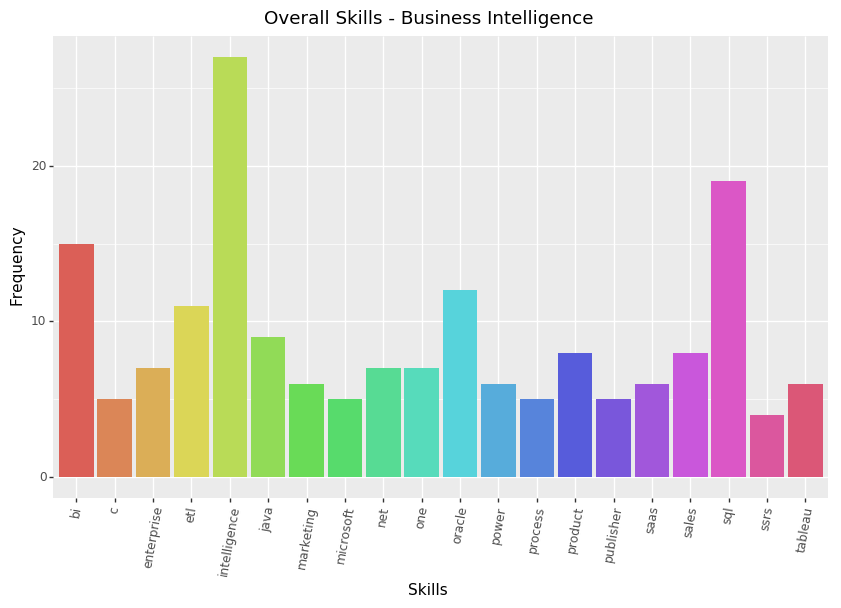

<ggplot: (-9223372036566782446)>

In [56]:
(ggplot(bi_skills_frequency, aes(x = "Business Intelligence", y = 'Frequency', fill='Business Intelligence')) +
 geom_bar(stat = "identity", position='stack', show_legend = False)+
 theme(figure_size=(10, 6),axis_text_x= element_text(rotation=80))+
 labs(title = "Overall Skills - Business Intelligence", x = "Skills", y = "Frequency")
)

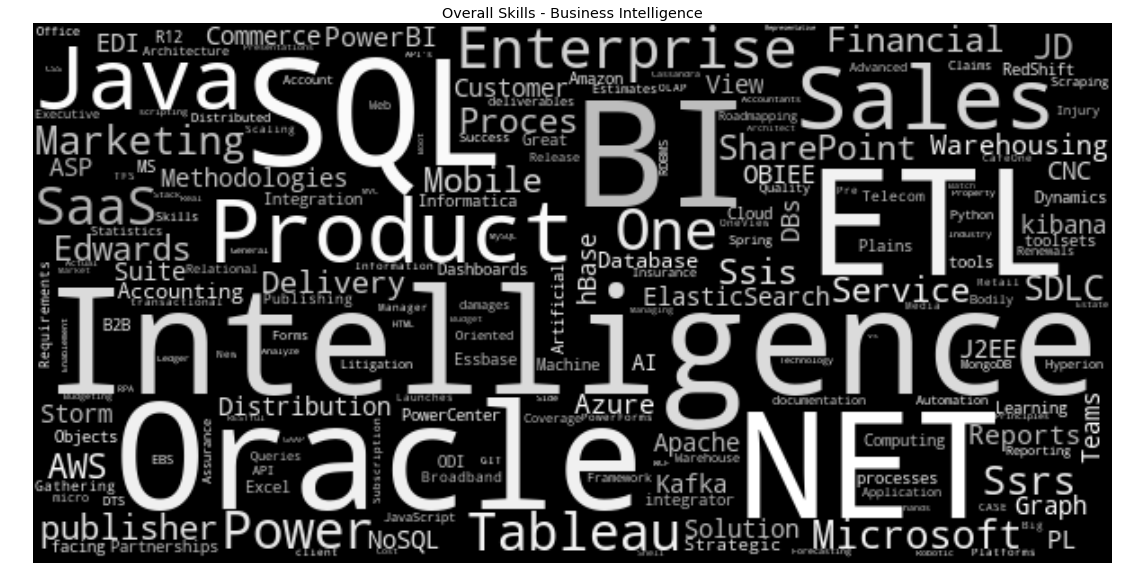

In [57]:
bi_overall_skills = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
bi_overall_skills.generate(bi_skills)
plt.figure(figsize = (15,7.5))
plt.imshow(bi_overall_skills.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Overall Skills - Business Intelligence")
plt.show()

# 3.) Analysis - Descriptions

In [58]:
description_df = master_data.copy()

In [59]:
#generate wordlist and lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [60]:
#preprocessing function
def my_preprocessing(s):
    s = s.lower() # downcase
    s = re.sub(r"\W"," ",s)
    s = re.sub(r"\d"," ",s) 
    s = re.sub(r"\s+[a-z]\s+"," ",s)
    s = re.sub(r"^[a-zA-Z\s*]*what you will be doing",'',s)
    s = re.sub(r"\s+",' ',s)
    return s

In [61]:
responsibilities=[]
benefits=[]
jddataset = description_df['Description']
for i in range(len(jddataset)):
    s = my_preprocessing(jddataset[i])
    if 'what in it for you' in s :
        responsibility = s.split('what in it for you')[0]
        benefit = s.split('what in it for you')[1]
    else:
        responsibility = s
        benefit = ''
    responsibilities.append(responsibility)
    benefits.append(benefit)

In [62]:
def my_tokenize(s):
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in set(stop_words)]# remove stopwords
    s = ' '.join(tokens)
    return s

In [63]:
#tokenize responsibilities
for i in range(len(responsibilities)):
    responsibilities[i] = my_tokenize(responsibilities[i])
    i = i+1

In [64]:
text = pd.DataFrame(responsibilities,columns = ['re'])
text['re']

0      traffic predictor risk assessment tool determi...
1      iterate improve risk engine fraud modelswork i...
2      become cornerstone company capability across p...
3      scientist engineer responsible following build...
4      scientist please read located north austin dow...
5      working help build cool product primary respon...
6      descriptiondata scientist need analyze financi...
7      scientist engineer responsible following build...
8      scientist mining set statistic philadelphiawe ...
9      scientist machine learning python tableau tren...
10     scientist southbaywe creating platform product...
11     work scientist product manager customer succes...
12     ideal candidate expertise working large set ex...
13     develop implement advanced statistical perform...
14     scientist report chief technology officer obje...
15     ideal candidate expertise working large set ex...
16     develop implement advanced statistical perform...
17     develop nlp help custome

In [65]:
text_list = [i.split() for i in text['re']]
len(text_list)

519

In [66]:
stop_list = ['experience', 'data']
for i in range(len(text_list)):
    for word in list(text_list[i]):  # iterating on a copy since removing will mess things up
        if word in stop_list:
            text_list[i].remove(word)

In [67]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(text_list)
dictionary.save('dictionary.dict')
print (dictionary)

Dictionary(4878 unique tokens: ['able', 'added', 'analytical', 'applied', 'apply']...)


In [68]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print (len(doc_term_matrix))
print (doc_term_matrix[100])

519
[(4, 1), (11, 1), (22, 1), (24, 1), (33, 1), (34, 3), (48, 1), (58, 1), (62, 1), (73, 1), (79, 1), (82, 1), (83, 1), (87, 1), (97, 1), (105, 1), (106, 2), (108, 1), (119, 1), (121, 1), (127, 1), (140, 2), (150, 1), (159, 1), (166, 1), (168, 1), (170, 1), (173, 1), (234, 1), (243, 1), (318, 1), (330, 1), (364, 1), (392, 1), (542, 1), (604, 1), (700, 1), (702, 1), (703, 1), (705, 1), (718, 1), (722, 1), (727, 1), (728, 1), (1230, 1), (1264, 1), (1302, 1), (1305, 1), (1323, 1), (1783, 4), (1785, 1), (1786, 1), (1787, 1), (1788, 2)]


In [69]:
from time import time
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO,
                   filename='running.log',filemode='w')

In [70]:
start = time()
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dictionary, passes=50)
print ('used: {:.2f}s'.format(time()-start))

used: 34.85s


In [71]:
for i in ldamodel.print_topics(): 
    for j in i: print (j)

0
0.010*"product" + 0.010*"work" + 0.009*"knowledge" + 0.009*"skill" + 0.009*"need" + 0.008*"project" + 0.008*"technology" + 0.008*"team" + 0.008*"process" + 0.007*"application"
1
0.014*"big" + 0.011*"knowledge" + 0.011*"time" + 0.010*"plus" + 0.010*"technology" + 0.010*"etc" + 0.009*"tool" + 0.009*"spark" + 0.008*"real" + 0.008*"understanding"
2
0.014*"application" + 0.011*"working" + 0.010*"need" + 0.010*"sql" + 0.009*"reporting" + 0.009*"year" + 0.009*"team" + 0.008*"work" + 0.007*"project" + 0.007*"knowledge"
3
0.017*"work" + 0.013*"knowledge" + 0.013*"need" + 0.011*"python" + 0.010*"strong" + 0.010*"develop" + 0.009*"team" + 0.009*"year" + 0.008*"sql" + 0.007*"quality"
4
0.016*"knowledge" + 0.013*"work" + 0.013*"need" + 0.011*"java" + 0.010*"year" + 0.009*"learning" + 0.008*"team" + 0.008*"please" + 0.008*"engineer" + 0.008*"machine"
5
0.011*"product" + 0.011*"need" + 0.011*"learning" + 0.010*"year" + 0.008*"machine" + 0.008*"degree" + 0.008*"solution" + 0.008*"team" + 0.007*"comp

In [72]:
ldamodel.save('topic.model')

In [73]:
import pyLDAvis.gensim
import gensim
pyLDAvis.enable_notebook()

In [74]:
d = gensim.corpora.Dictionary.load('dictionary.dict')
c = gensim.corpora.MmCorpus('corpus.mm')
lda = gensim.models.LdaModel.load('topic.model')

In [75]:
data = pyLDAvis.gensim.prepare(lda, c, d)
data

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
8      17.857403        1       1 -0.086161  0.003213
7      16.286602        1       2 -0.041807  0.089599
4      13.830793        1       3 -0.117430  0.045848
0      12.339328        1       4  0.089461  0.022681
2      10.633340        1       5  0.081491  0.039239
6       9.907346        1       6  0.199696 -0.021438
5       6.618175        1       7 -0.031821  0.080484
3       6.545170        1       8 -0.003235  0.027981
1       4.353397        1       9 -0.073921 -0.111582
9       1.628446        1      10 -0.016273 -0.176026, topic_info=     Category        Freq                  Term       Total  loglift  logprob
term                                                                         
17    Default  290.000000              learning  290.000000  30.0000  30.0000
20    Default  254.000000               machine  254.000000  29.0000  29.0000
304   Default  210.000000              platform  210.000000  28.0000  28.0000
274   Default  196.000000                   big  196.000000  27.0000  27.0000
62    Default  439.000000             knowledge  439.000000  26.0000  26.0000
173   Default  142.000000            developing  142.000000  25.0000  25.0000
571   Default  240.000000               project  240.000000  24.0000  24.0000
159   Default  153.000000                 build  153.000000  23.0000  23.0000
415   Default  296.000000           application  296.000000  22.0000  22.0000
28    Default  250.000000                python  250.000000  21.0000  21.0000
700   Default  104.000000             framework  104.000000  20.0000  20.0000
34    Default  278.000000                  tool  278.000000  19.0000  19.0000
131   Default  323.000000               product  323.000000  18.0000  18.0000
1404  Default   81.000000            javascript   81.000000  17.0000  17.0000
552   Default   84.000000                  like   84.000000  16.0000  16.0000
498   Default  208.000000                  java  208.000000  15.0000  15.0000
800   Default  142.000000               quality  142.000000  14.0000  14.0000
986   Default   62.000000                  core   62.000000  13.0000  13.0000
309   Default  105.000000             reporting  105.000000  12.0000  12.0000
233   Default  117.000000                 spark  117.000000  11.0000  11.0000
234   Default  216.000000                   sql  216.000000  10.0000  10.0000
291   Default   79.000000                  help   79.000000   9.0000   9.0000
320   Default  103.000000                  time  103.000000   8.0000   8.0000
82    Default  444.000000                  work  444.000000   7.0000   7.0000
135   Default   76.000000                  sale   76.000000   6.0000   6.0000
22    Default  556.000000                  need  556.000000   5.0000   5.0000
238   Default  245.000000                strong  245.000000   4.0000   4.0000
441   Default  145.000000                  code  145.000000   3.0000   3.0000
127   Default  161.000000           performance  161.000000   2.0000   2.0000
184   Default   85.000000               feature   85.000000   1.0000   1.0000
2348   Topic1   28.917778                    cs   29.721895   1.6953  -5.7798
2352   Topic1   39.060246                  html   40.279652   1.6920  -5.4792
2353   Topic1   19.322710                jquery   20.109055   1.6829  -6.1830
2548   Topic1   15.477383             hibernate   16.263695   1.6732  -6.4049
2715   Topic1   14.516262                  apex   15.302362   1.6700  -6.4690
2346   Topic1   13.554113               browser   14.340986   1.6663  -6.5376
1728   Topic1   13.526345                 scrum   14.340103   1.6643  -6.5397
1404   Topic1   75.929214            javascript   81.140533   1.6564  -4.8145
1503   Topic1    9.709562               raleigh   10.495645   1.6449  -6.8712
2695   Topic1    9.709527              backbone   10.495646   1.6449  -6.8712
1519   Topic1    8.702837        

In [76]:
pyLDAvis.save_html(data,'vis.html')

In [77]:
%%time
import gensim
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
lda = gensim.models.LdaModel.load('topic.model')

CPU times: user 8.75 ms, sys: 2.21 ms, total: 11 ms
Wall time: 20.6 ms


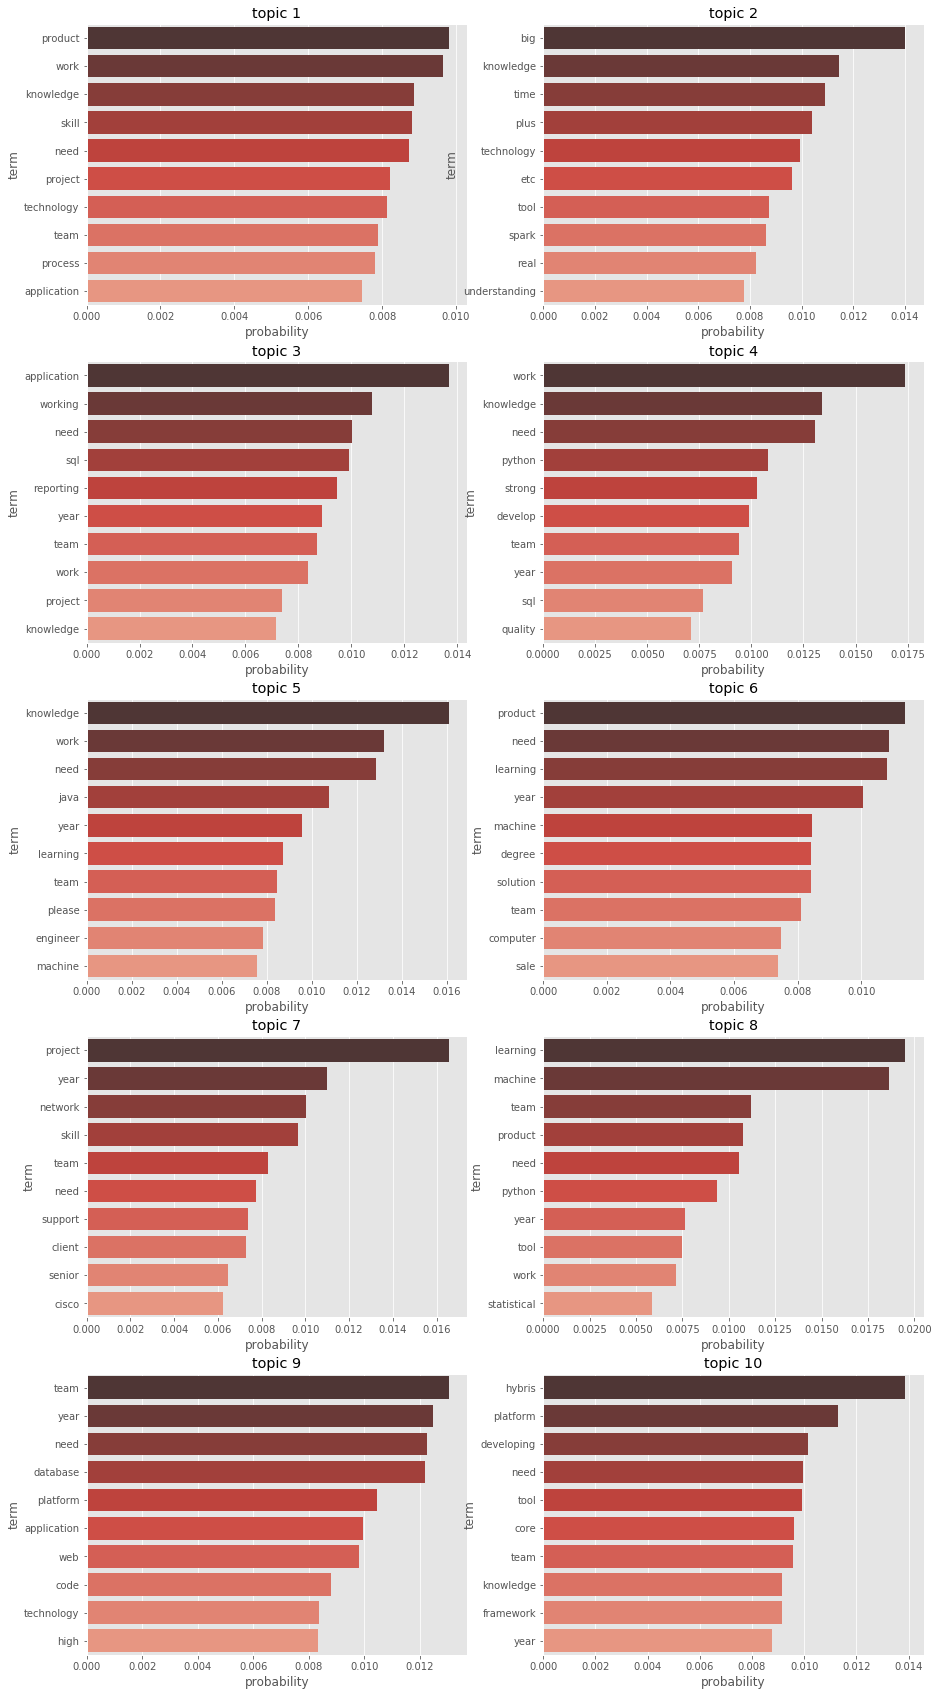

In [78]:
fiz=plt.figure(figsize=(15,30))
for i in range(10):
    df=pd.DataFrame(lda.show_topic(i), columns=['term','prob']).set_index('term')
    plt.subplot(5,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, label='Cities', palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()

### Description Word Frequency

In [79]:
word2count = {}
for data in responsibilities:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [80]:
#sort words 
from collections import OrderedDict
sorted_word = OrderedDict(sorted(word2count.items(), key=lambda kv: kv[1], reverse=True))
sorted_word

OrderedDict([('need', 605),
             ('team', 536),
             ('year', 515),
             ('knowledge', 482),
             ('work', 481),
             ('product', 349),
             ('working', 344),
             ('technology', 332),
             ('application', 319),
             ('learning', 312),
             ('solution', 306),
             ('tool', 305),
             ('machine', 273),
             ('python', 273),
             ('skill', 269),
             ('strong', 266),
             ('position', 263),
             ('project', 261),
             ('engineer', 241),
             ('develop', 235),
             ('environment', 234),
             ('new', 234),
             ('sql', 233),
             ('service', 230),
             ('platform', 229),
             ('java', 224),
             ('big', 214),
             ('degree', 213),
             ('etc', 213),
             ('please', 207),
             ('cloud', 205),
             ('database', 195),
             ('building', 192),

In [81]:
#choose most frequent ones
freq_words = heapq.nlargest(1000,word2count,key = word2count.get)
freq_words

['need',
 'team',
 'year',
 'knowledge',
 'work',
 'product',
 'working',
 'technology',
 'application',
 'learning',
 'solution',
 'tool',
 'machine',
 'python',
 'skill',
 'strong',
 'position',
 'project',
 'engineer',
 'develop',
 'environment',
 'new',
 'sql',
 'service',
 'platform',
 'java',
 'big',
 'degree',
 'etc',
 'please',
 'cloud',
 'database',
 'building',
 'computer',
 'plus',
 'technical',
 'process',
 'using',
 'related',
 'performance',
 'ability',
 'build',
 'understanding',
 'customer',
 'apply',
 'architecture',
 'support',
 'quality',
 'company',
 'code',
 'developing',
 'high',
 'including',
 'user',
 'problem',
 'based',
 'large',
 'web',
 'aws',
 'requirement',
 'programming',
 'senior',
 'language',
 'spark',
 'hadoop',
 'developer',
 'today',
 'industry',
 'field',
 'distributed',
 'algorithm',
 'least',
 'network',
 'complex',
 'end',
 'processing',
 'client',
 'infrastructure',
 'framework',
 'integration',
 'reporting',
 'time',
 'scientist',
 'highly',
 

In [82]:
word_frequencies =' '.join([str(i) for i in freq_words])

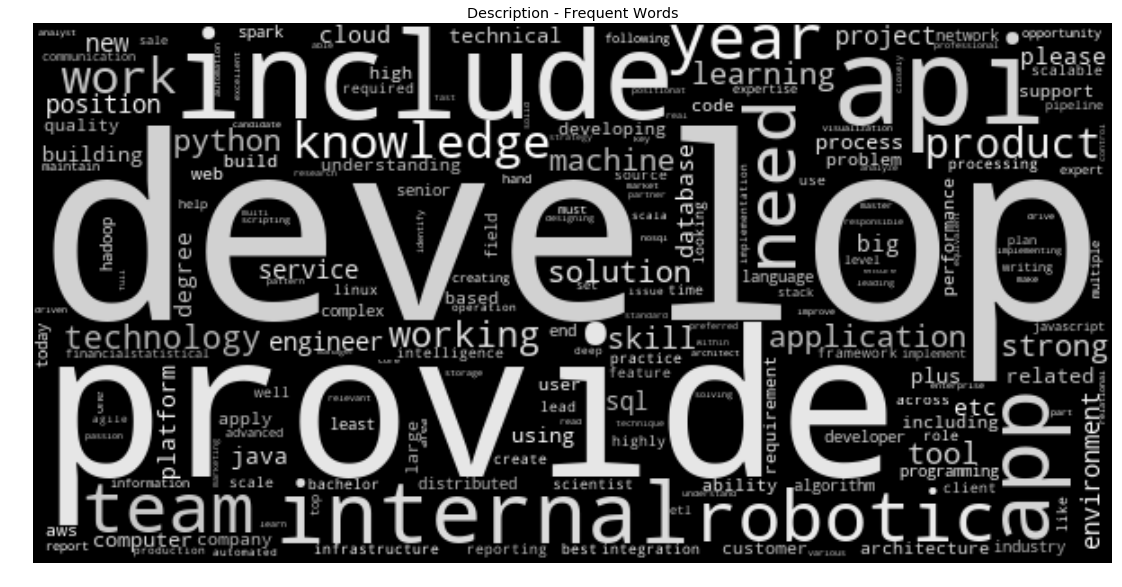

In [83]:
frequent_words = WordCloud(relative_scaling = 0, stopwords = stop_words, width = 600, height = 300)
frequent_words.generate(word_frequencies)
plt.figure(figsize = (15,7.5))
plt.imshow(frequent_words.recolor(color_func = grey_color_func, random_state = 1), interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad = -1)
plt.title("Description - Frequent Words")
plt.show()

## Salary Analysis

### What are you expected to earn in each state?

In [164]:
min_state_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_state_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [165]:
min_state_set = np.unique(min_state_df['States'])
max_state_set = np.unique(max_state_df['States'])

min_state_dict = dict(tuple(min_state_df.groupby('States')))
max_state_dict = dict(tuple(max_state_df.groupby('States')))

In [166]:
min_state_salaries = {}
max_state_salaries = {}
for state in min_state_set:
    avg_min_salary = int(min_state_dict[state]['Min_Salary'].mean())
    min_state_salaries.update({state : avg_min_salary})

for state in max_state_set:
    avg_max_salary = int(max_state_dict[state]['Max_Salary'].mean())
    max_state_salaries.update({state : avg_max_salary})
    
min_state_salaries = OrderedDict(sorted(min_state_salaries.items(), key=lambda t: t[1]))
max_state_salaries = OrderedDict(sorted(max_state_salaries.items(), key=lambda t: t[1]))

### What is the minimum expected salary to earn in each state?

In [167]:
min_state_salaries

OrderedDict([('NV', 55000),
             ('AZ', 60000),
             ('IN', 67000),
             ('IA', 67500),
             ('ME', 70000),
             ('MI', 70000),
             ('NE', 70000),
             ('AL', 75000),
             ('CO', 80000),
             ('KS', 80000),
             ('OH', 80000),
             ('RI', 80000),
             ('UT', 80000),
             ('SC', 82500),
             ('FL', 83333),
             ('MO', 86000),
             ('TN', 86666),
             ('MN', 90000),
             ('WI', 90000),
             ('NC', 90625),
             ('ON', 92500),
             ('MA', 103076),
             ('MD', 105833),
             ('PA', 108125),
             ('NH', 110000),
             ('VA', 110454),
             ('WA', 111428),
             ('NY', 112750),
             ('TX', 114285),
             ('CT', 115000),
             ('NJ', 120000),
             ('OR', 120000),
             ('IL', 120833),
             ('CA', 123017),
             ('DC', 140000)])

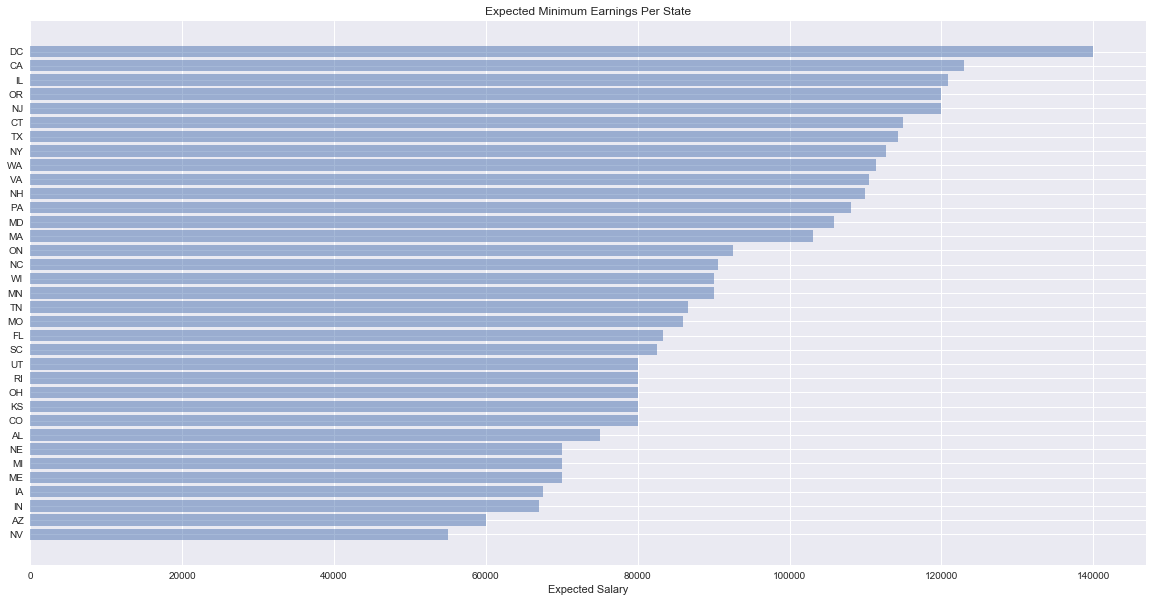

In [168]:
plt.rcParams['figure.figsize'] = (20,10)
min_state_names = list(min_state_salaries.keys())
min_state_values = sorted(list(min_state_salaries.values()))
min_state_y_pos = np.arange(len(min_state_names))

plt.barh(min_state_y_pos, min_state_values, align = 'center',alpha = 0.5)
plt.yticks(min_state_y_pos, min_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per State')
plt.show()

In [169]:
cmin_state_salaries = pd.DataFrame({'States' : min_state_names, 'Min Earnings' : min_state_values})
cmin_state_salaries = cmin_state_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_state_salaries = cmin_state_salaries[['States','Min Earnings']]
cmin_state_salaries[:10]


States  Min Earnings
0     DC        140000
1     CA        123017
2     IL        120833
3     OR        120000
4     NJ        120000
5     CT        115000
6     TX        114285
7     NY        112750
8     WA        111428
9     VA        110454

### What is the maximum expected salary to each in each state?

In [170]:
max_state_salaries

OrderedDict([('NV', 67500),
             ('AZ', 80000),
             ('RI', 85000),
             ('ME', 90000),
             ('IA', 95000),
             ('MI', 96000),
             ('IN', 96250),
             ('AL', 98750),
             ('KS', 100000),
             ('UT', 100000),
             ('TN', 103333),
             ('CO', 105000),
             ('MN', 110000),
             ('NE', 110000),
             ('FL', 113333),
             ('MO', 116000),
             ('NC', 116875),
             ('OH', 120000),
             ('WI', 120000),
             ('SC', 125000),
             ('ON', 135000),
             ('PA', 137500),
             ('MD', 140000),
             ('NH', 140000),
             ('NJ', 142500),
             ('MA', 145769),
             ('OR', 150000),
             ('TX', 152142),
             ('VA', 157272),
             ('NY', 160875),
             ('DC', 166666),
             ('CA', 171686),
             ('CT', 175000),
             ('WA', 175714),
             ('IL', 19

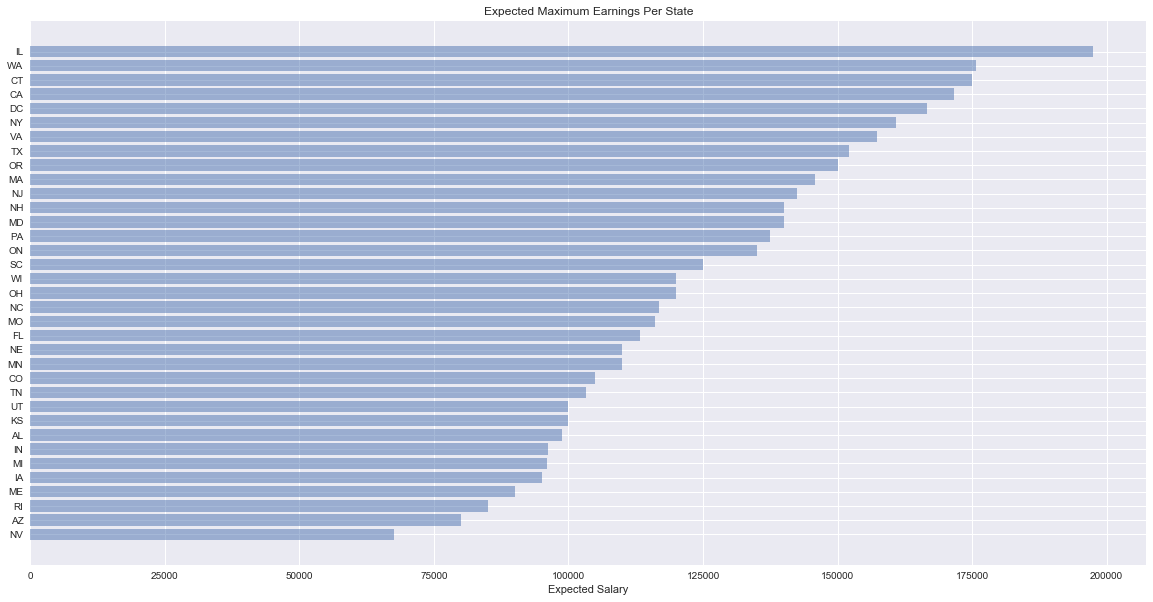

In [171]:
plt.rcParams['figure.figsize'] = (20,10)
max_state_names = list(max_state_salaries.keys())
max_state_values = sorted(list(max_state_salaries.values()))
max_state_y_pos = np.arange(len(max_state_names))

plt.barh(max_state_y_pos, max_state_values, align = 'center',alpha = 0.5)
plt.yticks(max_state_y_pos, max_state_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per State')
plt.show()

In [172]:
cmax_state_salaries = pd.DataFrame({'States' : max_state_names, 'Max Earnings' : max_state_values})
cmax_state_salaries = cmax_state_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_state_salaries = cmax_state_salaries[['States','Max Earnings']]
cmax_state_salaries[:10]

States  Max Earnings
0     IL        197500
1     WA        175714
2     CT        175000
3     CA        171686
4     DC        166666
5     NY        160875
6     VA        157272
7     TX        152142
8     OR        150000
9     MA        145769

### What are the expected earnings for the top 10 highest minimum and maximum location salaries?

In [173]:
min_location_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_location_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [174]:
min_location_set = np.unique(min_location_df['Location'])
max_location_set = np.unique(max_location_df['Location'])

min_location_dict = dict(tuple(min_location_df.groupby('Location')))
max_location_dict = dict(tuple(max_location_df.groupby('Location')))

In [175]:
min_location_salaries = {}
max_location_salaries = {}
for state in min_location_set:
    LOCavg_min_salary = int(min_location_dict[state]['Min_Salary'].mean())
    min_location_salaries.update({state : LOCavg_min_salary})

for state in max_location_set:
    LOCavg_max_salary = int(max_location_dict[state]['Max_Salary'].mean())
    max_location_salaries.update({state : LOCavg_max_salary})
    
min_location_salaries = OrderedDict(sorted(min_location_salaries.items(), key=lambda t: t[1]))
max_location_salaries = OrderedDict(sorted(max_location_salaries.items(), key=lambda t: t[1]))

from collections import Counter
min_location_salaries = collections.Counter(min_location_salaries).most_common(10)
max_location_salaries = collections.Counter(max_location_salaries).most_common(10)

min_location_salaries = OrderedDict(sorted(dict(min_location_salaries).items(), key = lambda t:t[1]))
max_location_salaries = OrderedDict(sorted(dict(max_location_salaries).items(), key = lambda t:t[1]))

In [176]:
min_location_salaries

OrderedDict([('Long Beach, CA', 140000),
             ('Ventura County, CA', 140000),
             ('Washington, DC', 140000),
             ('San Mateo, CA', 142500),
             ('Brooklyn, NY', 150000),
             ('Milpitas, CA', 156666),
             ('Sunnyvale, CA', 158333),
             ('Palo Alto, CA', 160000),
             ('Santa Clara, CA', 160000),
             ('Cupertino, CA', 175000)])

In [177]:
max_location_salaries

OrderedDict([('San Jose, CA', 198636),
             ('Annapolis Junction, MD', 200000),
             ('Brooklyn, NY', 200000),
             ('Fairfield, CT', 200000),
             ('Santa Clara, CA', 200000),
             ('Seattle, WA', 205000),
             ('Palo Alto, CA', 206428),
             ('Chicago, IL', 220000),
             ('West Hollywood, CA', 250000),
             ('Cupertino, CA', 325000)])

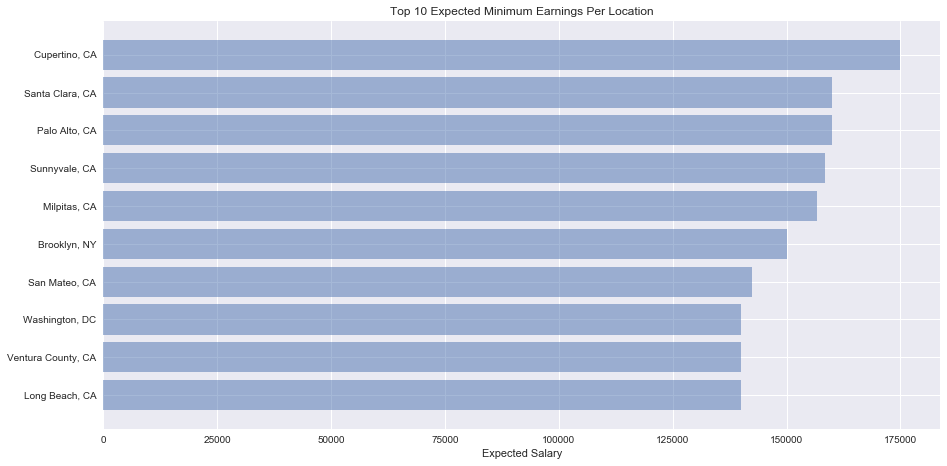

In [178]:
plt.rcParams['figure.figsize'] = (15,7.5)
min_location_names = list(min_location_salaries.keys())
min_location_values = sorted(list(min_location_salaries.values()))
min_location_y_pos = np.arange(len(min_location_names))

plt.barh(min_location_y_pos, min_location_values, align = 'center',alpha = 0.5)
plt.yticks(min_location_y_pos, min_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Minimum Earnings Per Location')
plt.show()

In [179]:
cmin_location_salaries = pd.DataFrame({'Location' : min_location_names, 'Min Earnings' : min_location_values})
cmin_location_salaries = cmin_location_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_location_salaries = cmin_location_salaries[['Location','Min Earnings']]
cmin_location_salaries

Location  Min Earnings
0       Cupertino, CA        175000
1       Palo Alto, CA        160000
2     Santa Clara, CA        160000
3       Sunnyvale, CA        158333
4        Milpitas, CA        156666
5        Brooklyn, NY        150000
6       San Mateo, CA        142500
7      Long Beach, CA        140000
8  Ventura County, CA        140000
9      Washington, DC        140000

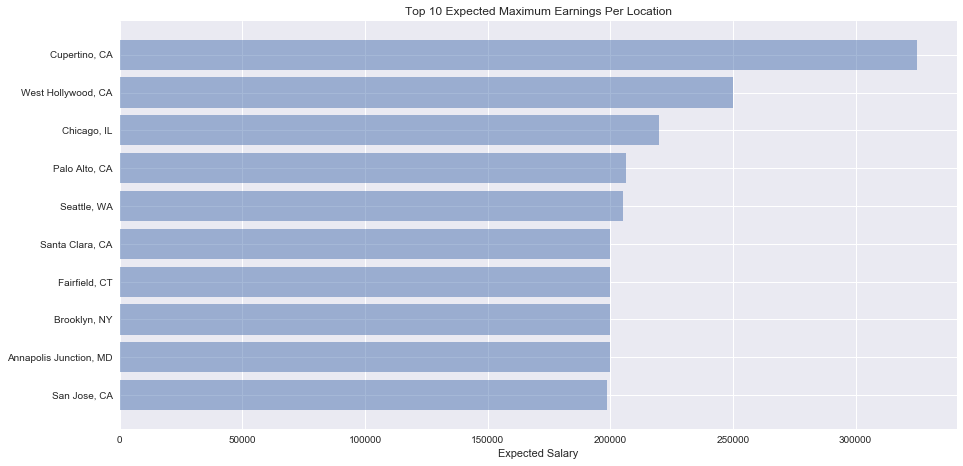

In [180]:
plt.rcParams['figure.figsize'] = (15,7.5)
max_location_names = list(max_location_salaries.keys())
max_location_values = sorted(list(max_location_salaries.values()))
max_location_y_pos = np.arange(len(max_location_names))

plt.barh(max_location_y_pos, max_location_values, align = 'center',alpha = 0.5)
plt.yticks(max_location_y_pos, max_location_names)
plt.xlabel('Expected Salary')
plt.title('Top 10 Expected Maximum Earnings Per Location')
plt.show()

In [181]:
cmax_location_salaries = pd.DataFrame({'Location' : max_location_names, 'Earnings' : max_location_values})
cmax_location_salaries = cmax_location_salaries.sort_values(by = 'Earnings', ascending = False).reset_index(drop = True)
cmax_location_salaries = cmax_location_salaries[['Location','Earnings']]
cmax_location_salaries

Location  Earnings
0           Cupertino, CA    325000
1      West Hollywood, CA    250000
2             Chicago, IL    220000
3           Palo Alto, CA    206428
4             Seattle, WA    205000
5  Annapolis Junction, MD    200000
6            Brooklyn, NY    200000
7           Fairfield, CT    200000
8         Santa Clara, CA    200000
9            San Jose, CA    198636

### What are the expected earnings minimum and maximum earnings for each job type (Data Scientist, Data Engineer, Data Analyst, and Business Intelligence)?

In [182]:
min_job_df = master_data[master_data['Min_Salary'] != 'Unknown'].reset_index(drop = True)
max_job_df = master_data[master_data['Max_Salary'] != 'Unknown'].reset_index(drop = True)

In [183]:
min_job_set = np.unique(min_job_df['Search'])
max_job_set = np.unique(max_job_df['Search'])

min_job_dict = dict(tuple(min_job_df.groupby('Search')))
max_job_dict = dict(tuple(max_job_df.groupby('Search')))

In [184]:
min_job_salaries = {}
max_job_salaries = {}
for job in min_job_set:
    avg_MINjob_salary = int(min_job_dict[job]['Min_Salary'].mean())
    min_job_salaries.update({job : avg_MINjob_salary})

for job in max_job_set:
    avg_MAXjob_salary = int(max_job_dict[job]['Max_Salary'].mean())
    max_job_salaries.update({job : avg_MAXjob_salary})
    
min_job_salaries = OrderedDict(sorted(min_job_salaries.items(), key=lambda t: t[1]))
max_job_salaries = OrderedDict(sorted(max_job_salaries.items(), key=lambda t: t[1]))

In [185]:
min_job_salaries

OrderedDict([('Data Analyst', 73793),
             ('Data Engineer', 114073),
             ('Business Intelligence', 115757),
             ('Data Scientist', 121800)])

In [186]:
max_job_salaries

OrderedDict([('Data Analyst', 96428),
             ('Business Intelligence', 153125),
             ('Data Engineer', 158706),
             ('Data Scientist', 176800)])

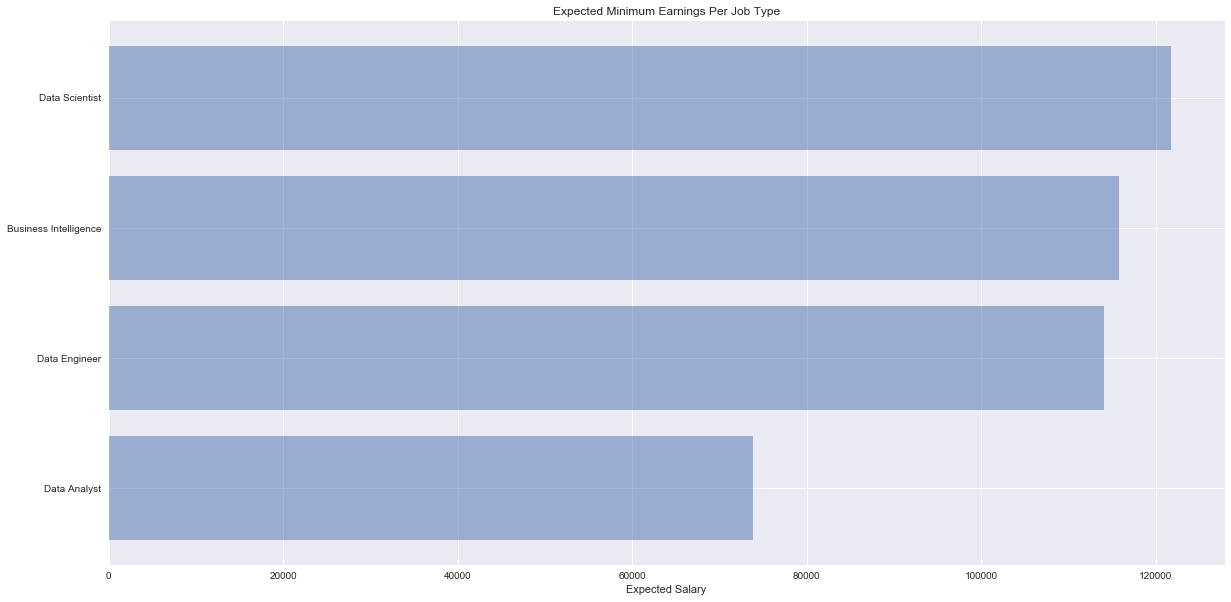

In [187]:
plt.rcParams['figure.figsize'] = (20,10)
min_job_names = list(min_job_salaries.keys())
min_job_values = sorted(list(min_job_salaries.values()))
min_job_y_pos = np.arange(len(min_job_names))

plt.barh(min_job_y_pos, min_job_values, align = 'center',alpha = 0.5)
plt.yticks(min_job_y_pos, min_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Minimum Earnings Per Job Type')
plt.show()

In [192]:
cmin_job_salaries = pd.DataFrame({'Job Type' : min_job_names, 'Min Earnings' : min_job_values})
cmin_job_salaries = cmin_job_salaries.sort_values(by = 'Min Earnings', ascending = False).reset_index(drop = True)
cmin_job_salaries = cmin_job_salaries[['Job Type','Min Earnings']]
cmin_job_salaries

Job Type  Min Earnings
0         Data Scientist        121800
1  Business Intelligence        115757
2          Data Engineer        114073
3           Data Analyst         73793

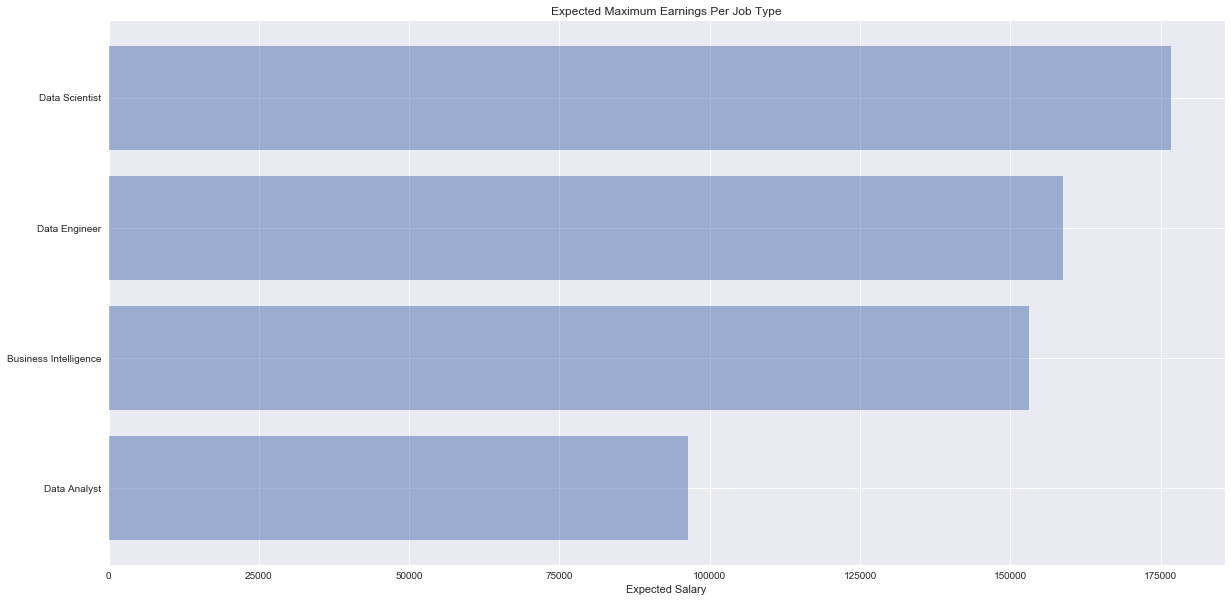

In [193]:
plt.rcParams['figure.figsize'] = (20,10)
max_job_names = list(max_job_salaries.keys())
max_job_values = sorted(list(max_job_salaries.values()))
max_job_y_pos = np.arange(len(max_job_names))

plt.barh(max_job_y_pos, max_job_values, align = 'center',alpha = 0.5)
plt.yticks(max_job_y_pos, max_job_names)
plt.xlabel('Expected Salary')
plt.title('Expected Maximum Earnings Per Job Type')
plt.show()

In [194]:
cmax_job_salaries = pd.DataFrame({'Job Type' : max_job_names, 'Max Earnings' : max_job_values})
cmax_job_salaries = cmax_job_salaries.sort_values(by = 'Max Earnings', ascending = False).reset_index(drop = True)
cmax_job_salaries = cmax_job_salaries[['Job Type','Max Earnings']]
cmax_job_salaries

Job Type  Max Earnings
0         Data Scientist        176800
1          Data Engineer        158706
2  Business Intelligence        153125
3           Data Analyst         96428

# exploratory analysis

In [105]:
import pandas as pd
import numpy as np
import plotnine as gg
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import geopandas as gpd         
import osmnx as ox              
import shapely.geometry as geom 
df = pd.read_csv('jobs_data.csv')

In [106]:
df.dtypes

Search          object
Title           object
Description     object
Skills          object
Location        object
Cities          object
States          object
Latitude       float64
Longitude      float64
Min_Salary      object
Max_Salary      object
Mean_Salary     object
URL             object
dtype: object

In [107]:
df.Mean_Salary = pd.to_numeric(df.Mean_Salary, errors='coerce')
df.Max_Salary = pd.to_numeric(df.Max_Salary, errors='coerce')
df.Min_Salary= pd.to_numeric(df.Min_Salary, errors='coerce')

In [108]:
df1 = df.dropna(subset = ['Mean_Salary', 'Min_Salary', 'Max_Salary'])

# distribution of mean salary

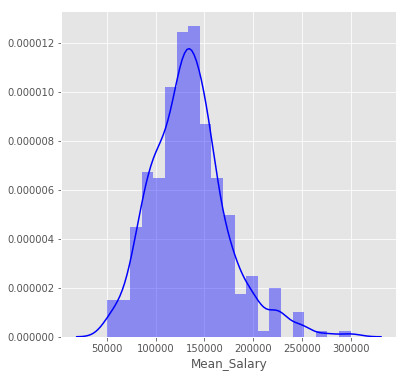

In [109]:
# histogram
plt.figure(figsize=(6,6))
sns.distplot(df1['Mean_Salary'].dropna(),color = 'blue')

## Is there a different distribution of location(State, City)/Job Title(data scientist/analyst/engineer/BI) of mean salary?

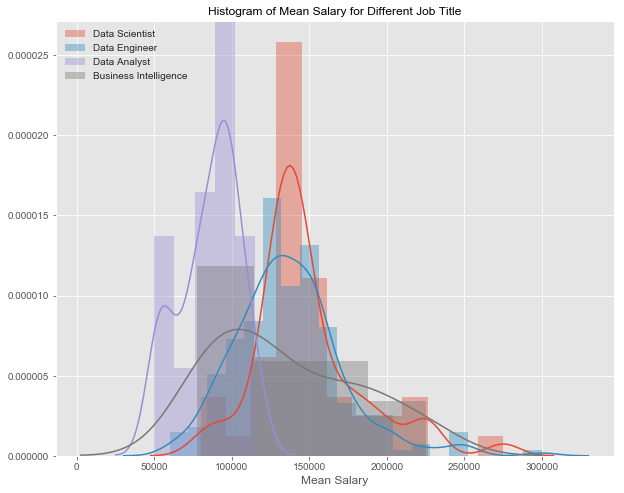

In [110]:
#histogram of price based on different job titles
job_type = df1.Search.unique()

plt.subplots(figsize=(10,8))
for t in np.ndenumerate(job_type):
    kind = df1[df1['Search'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

TypeError: len() of unsized object

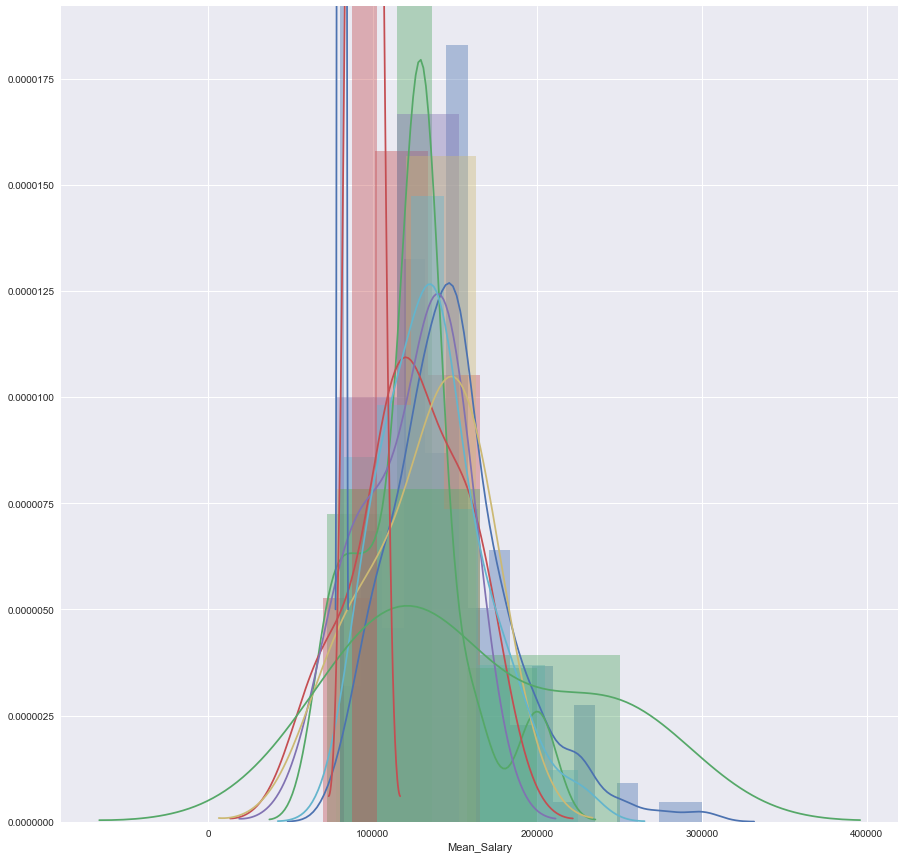

In [111]:
#histogram of price based on different states
job_type = df1.States.unique()

plt.subplots(figsize=(15,15))
for t in np.ndenumerate(job_type):
    kind = df1[df1['States'] == t[1]]
    sns.distplot(kind.Mean_Salary.dropna(), label=t[1], norm_hist = True)
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.legend(loc=2)
plt.title('Histogram of Mean Salary for Different Job Title')
plt.xlabel('Mean Salary')
plt.show()

In [ ]:
df1.groupby(['States','Search']).agg({'Mean_Salary': 'mean'}).head()

In [ ]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Pair plot to explore variables
with sns.plotting_context("notebook",font_scale=1.5):
    g = sns.pairplot(df1, vars = ['Mean_Salary','Min_Salary','Max_Salary','Longitude','Latitude'], hue='Search',
                    palette= sns.hls_palette(4),size=2)
g.set(xticklabels=[]);


In [ ]:
# seaborn correlation matrix
str_list = []
for colname, colvalue in df1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
            
# Only compare numerical features          
diff_list = df1.columns.difference(str_list) 
df2 = df1[diff_list]
f, ax = plt.subplots(figsize=(12, 8))
plt.title('Pearson Correlation Matrix')

sns.heatmap(df2.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="GnBu", linecolor='k', annot=True)
plt.show()

# Linear regression model of salary

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error 
from sklearn import preprocessing

In [ ]:
df2 = df1[['Mean_Salary','Latitude','Longitude']]
df2.dtypes

In [ ]:
from sklearn.cross_validation import train_test_split
train_data, test_data = train_test_split(df2, train_size = 0.8, random_state = 10)

__Simple Linear Regression (One Variable)__

In [ ]:
def simple_linear(train, test, feature):
    """simple linear regression function specified for the use of our dataset 
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression()
    #Train the model
    regr.fit(train.as_matrix(columns = [feature]), train.as_matrix(columns = ['Mean_Salary']))
    # Calculate the RMSE on test data
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = [feature])))**0.5 
    return RMSE, regr.intercept_[0], regr.coef_[0][0]

#create an input list, remove the variables we are predicting and non-numerical data
input_list = train_data.columns.values.tolist()
input_list.remove('Mean_Salary') 

simple_linear_result = pd.DataFrame(columns = ['feature', 'RMSE', 'intercept', 'coefficient'])

# Calculate the RMSE of the test data for each feature
for p in input_list:
    RMSE, w1, w0 = simple_linear(train_data, test_data, p)
    simple_linear_result = simple_linear_result.append({'feature':p, 'RMSE':RMSE, 'intercept':w0, 'coefficient': w1}
                                                        ,ignore_index=True)
simple_linear_result

In [ ]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Latitude, y = df2.Mean_Salary)
plt.title('Latitude vs.Mean_Salary')
plt.xlabel('Latitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

In [ ]:
#plot scatterplot 
plt.figure(figsize=(8, 5))
ax = sns.regplot(x = df2.Longitude, y = df2.Mean_Salary)
plt.title('Longitude vs.Mean_Salary')
plt.xlabel('Longitude')
plt.ylabel('Mean Salary')

plt.tight_layout()

__Multi Linear Regression (Two Variables)__

In [ ]:
# further split the train_data to include a validation set
#train_data2 = 60%, validation_data = 20%, test_data = 20%
train_data_2, validation_data = train_test_split(train_data, train_size = 0.75, random_state = 50)

In [ ]:
def RMSE(train, validation, features, new_input):
    """RMSE specified for the return RMSE of features
    Args:
        train(dataframe): training dataset
        validation(dataframe): validation dataset
        feature(Series): features in a dataset
        new_input (feature): reminding feature in the dataset
    Returns:
        RMSE(float): Root Mean Squared Error of train data
        RMSE(float): Root Mean Squared Error of validation data
    """
    features_list = list(features)
    features_list.append(new_input)
    regr = linear_model.LinearRegression() 
    regr.fit(train.as_matrix(columns = features_list), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE_train = mean_squared_error(train.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(train.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    RMSE_validation = mean_squared_error(validation.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(validation.as_matrix(columns = features_list)))**0.5 # Calculate the RMSE on train data
    return RMSE_train, RMSE_validation 

In [ ]:
input_list = train_data_2.columns.values.tolist()
input_list.remove('Mean_Salary')

greedy_algorithm = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])  
i = 0
temp_list = []


# Go through all the features in the dataframe
while len(input_list)>0:
    
    # temporarily store the best feature at each iteration
    temp = pd.DataFrame(columns = ['feature', 'train_error', 'validation_error'])
    
    # to test all the remaining features
    for p in input_list:
        RMSE_train, RMSE_validation = RMSE(train_data_2, validation_data, temp_list, p)
        temp = temp.append({'feature':p, 'train_error':RMSE_train, 'validation_error':RMSE_validation}, ignore_index=True)
    
    # select the best feature with smallest train error
    temp = temp.sort_values('train_error')
    best = temp.iloc[0,0]
    temp_list.append(best)
    greedy_algorithm = greedy_algorithm.append({'feature': best, 
                                                  'train_error': temp.iloc[0,1], 'validation_error': temp.iloc[0,2]}, 
                                                 ignore_index=True)
    #remove the best feature before next iteration
    input_list.remove(best)
    i += 1
greedy_algorithm

In [ ]:
def multiple_regression_model(train, test, input_features):
    """modifided version of simple linear regression function to take mutliple features
    Args:
        train(dataframe): training dataset
        test(dataframe): testing dataset
        input_feature(Series): features in a dataset
    Returns:
        RMSE(float): Root Mean Squared Error
        regr.intercept (float): regression interception
        regr.coefficient (float): regression coefficient
    """
    regr = linear_model.LinearRegression() # Create a linear regression object
    regr.fit(train.as_matrix(columns = input_features), train.as_matrix(columns = ['Mean_Salary'])) # Train the model
    RMSE = mean_squared_error(test.as_matrix(columns = ['Mean_Salary']), 
                              regr.predict(test.as_matrix(columns = input_features)))**0.5 # Calculate the RMSE on test data
    return RMSE, regr.intercept_[0], regr.coef_ 

In [ ]:
greedy_algo_features_list = greedy_algorithm['feature'].tolist()[:4]
test_error, _, _ = multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)
print ('test error (RMSE) is: %s' %test_error)

Mean_Salary = -14648.4802 + Longitude x -575.3558 + Latitude x 2448.8531

In [ ]:
multiple_regression_model(train_data_2, test_data, greedy_algo_features_list)